<a href="https://colab.research.google.com/github/Vinicius-BFS/data_science_projetos/blob/main/O_list_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly
!pip install cufflinks
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=102463b1b105194216a66a6bc17d2da6e1787acac50a1dbe779f97ccc9059866
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


## Importação de bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import pandasql as ps
from functools import reduce
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Habilitando conexão com google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Leitura dos arquivos de dados

In [ ]:
filesList = []

for dirname, _, filenames in os.walk('/content/drive/My Drive/Olist/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
       
        file = os.path.join(dirname, filename)
        fileExt = file[43:-12] 
 
        #read each file in their variable name
        exec('data_{:s} = pd.read_csv("{:s}")'.format(fileExt, file)) 
        
        #append list of files
        filesList.append('data_{:s}'.format(fileExt))

        # -- Display the files that will be loaded and the varible names
        # print('data_{}'.format(fileExt))

filesList

/content/drive/My Drive/Olist/dataset/olist_customers_dataset.csv
/content/drive/My Drive/Olist/dataset/olist_geolocation_dataset.csv
/content/drive/My Drive/Olist/dataset/olist_order_items_dataset.csv
/content/drive/My Drive/Olist/dataset/olist_order_payments_dataset.csv
/content/drive/My Drive/Olist/dataset/product_category_name_translation.csv
/content/drive/My Drive/Olist/dataset/olist_sellers_dataset.csv
/content/drive/My Drive/Olist/dataset/olist_order_reviews_dataset.csv
/content/drive/My Drive/Olist/dataset/olist_products_dataset.csv
/content/drive/My Drive/Olist/dataset/olist_orders_dataset.csv


['data__customers',
 'data__geolocation',
 'data__order_items',
 'data__order_payments',
 'data_ct_category_name_tra',
 'data__sellers',
 'data__order_reviews',
 'data__products',
 'data__orders']

## Verificação e tratamento de dados

In [ ]:
data__order_items.shape

(112650, 7)

In [ ]:
#Excluindo campos desnecessários para a EDA
data__order_items.isnull().sum()
data__order_items.drop(['seller_id'],axis=1,inplace=True)
data__order_items.drop(['shipping_limit_date'],axis=1,inplace=True)
data__order_items.sample(15)

,order_id,order_item_id,product_id,price,freight_value
62231,8e111be7da8066764ce7894bc1623c69,1,2fffbf105cbbc6e86144f00ecf571635,55.50,13.05
49234,6fdb9a84ef8876ba281624f310baf6b2,1,c072e7b87c8413341505d50d8234fbc2,79.00,24.16
109303,f86264f3909d2925f91a81b8a105e0cd,1,64b4f32393cbf55be791078e7a2adca0,139.90,16.08
17361,27c6771e4bc936d8ef460989587acc1a,1,9a7c0784b8058269d176b3089c946ed0,54.99,16.14
38877,585ce4ee0af830235ceed384bcbe545f,1,781a5256893d06b9526750ff0b5f50e4,75.00,18.63
88075,c80425e9138d23b213a2cfd0261ddc69,1,1fa968aa921dd9cdf625d5caf8f96654,21.99,12.69
78423,b27025d21677712033b453ec8bc2fed0,1,0b2c18d8e73e17348a011241525cb089,199.00,16.14
45008,665529c259350d60618eca48496ea75d,1,2f5e485bacfeb554bec55cd497c9bc51,45.99,15.10
29459,42ff676d61e2f5f1b7dfc8404dc3160d,1,99a4788cb24856965c36a24e339b6058,89.90,21.12
78246,b212ae280f3fe00945dce73c3e0bc817,1,fed5c40c27e1c88560a9e92d82ee0825,19.90,25.63


In [ ]:
data__order_items.isnull().sum()

order_id         0
order_item_id    0
product_id       0
price            0
freight_value    0
dtype: int64

In [ ]:
#Como podermos ver, um pedido pode ter mais de um item
data__order_items.groupby('order_id').size().sort_values(ascending=False)

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Length: 98666, dtype: int64

In [ ]:
data__order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
data__customers.isnull().sum()
data__customers.drop(['customer_zip_code_prefix'],axis=1,inplace=True)
data__customers.head()

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP


In [ ]:
#Verificando a disposição da base de dados de pedidos por status
data__orders.value_counts(data__orders['order_status'])

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
dtype: int64

In [ ]:
#Para classificaçao de clientes, consideraremos apenas os produtos entregues
data__orders=data__orders.loc[data__orders['order_status']=='delivered']
data__orders['order_purchase_timestamp'] = pd.to_datetime(data__orders['order_purchase_timestamp'])
data__orders['order_estimated_delivery_date'] = pd.to_datetime(data__orders['order_estimated_delivery_date'])
data__orders['order_delivered_customer_date'] = pd.to_datetime(data__orders['order_delivered_customer_date'])
data__orders['dif_previsao_entrega']=((data__orders['order_estimated_delivery_date'])-(data__orders['order_delivered_customer_date'])).dt.days
data__orders['dif_previsao_entrega'].fillna(0,inplace=True)
data__orders.dropna(inplace=True)
data__orders.isnull().sum()
data__orders.shape


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(96455, 9)

In [ ]:
data__orders['dif_previsao_entrega']=data__orders['dif_previsao_entrega'].astype('int64')
data__orders.sample(10)
data__orders.loc[data__orders['dif_previsao_entrega']<0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,dif_previsao_entrega
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,-12
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,-10
35,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,-1
41,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,-8
57,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,-2
...,...,...,...,...,...,...,...,...,...
99396,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-16,-6
99397,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02,-4
99423,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31,-22
99425,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09,-3


In [ ]:
#Criando colunas separando as datas para análise
data__orders['ano_compra'] = data__orders['order_purchase_timestamp'].dt.year
data__orders['mes_compra'] = data__orders['order_purchase_timestamp'].dt.month
data__orders['dia_compra'] = data__orders['order_purchase_timestamp'].dt.day
data__orders['dia_semana_compra'] = data__orders['order_purchase_timestamp'].dt.weekday

In [ ]:
#Deletando colunas que não serão utilizadas
data__orders.drop(['order_approved_at'],axis=1,inplace=True)
data__orders.drop(['order_delivered_carrier_date'],axis=1,inplace=True)
data__orders.drop(['order_delivered_customer_date'],axis=1,inplace=True)
data__orders.drop(['order_estimated_delivery_date'],axis=1,inplace=True)
data__orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,dif_previsao_entrega,ano_compra,mes_compra,dia_compra,dia_semana_compra
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7,2017,10,2,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,5,2018,7,24,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,17,2018,8,8,2
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,12,2017,11,18,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,9,2018,2,13,1


In [ ]:
#Criando campos de dia da semana
name_dia = []
for d in data__orders.dia_semana_compra:
  if d == 6:
    d = 'dom'
  elif d == 0:
    d = 'seg'
  elif d == 1:
    d = 'ter'
  elif d == 2:
    d = 'qua'
  elif d == 3:
    d = 'qui'
  elif d == 4:
    d = 'sex'
  else:
    d = 'sab'
  name_dia.append(d)
data__orders['dia_semana_compra'] = name_dia
data__orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,dif_previsao_entrega,ano_compra,mes_compra,dia_compra,dia_semana_compra
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7,2017,10,2,seg
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,5,2018,7,24,ter
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,17,2018,8,8,qua
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,12,2017,11,18,sab
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,9,2018,2,13,ter


In [ ]:
#Preenchendo valores nulos de categoria como No category para não influenciar nos itens de pedido que não tiverem categoria
data__products['product_category_name'].fillna('Não informado',inplace =True)
data__products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
#Deletando colunas que não serão utilizadas
data__products.drop(['product_name_lenght'],axis=1,inplace=True)
data__products.drop(['product_photos_qty'],axis=1,inplace=True)
data__products.drop(['product_description_lenght'],axis=1,inplace=True)
data__products.drop(['product_weight_g'],axis=1,inplace=True)
data__products.drop(['product_length_cm'],axis=1,inplace=True)
data__products.drop(['product_height_cm'],axis=1,inplace=True)
data__products.drop(['product_width_cm'],axis=1,inplace=True)
data__products.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [ ]:
data__order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
#Substituindo valores nulos de titulo e mensagem nos reviews
data__order_reviews['review_comment_title'].fillna('Sem Titulo',inplace =True)
data__order_reviews['review_comment_message'].fillna('Sem Mensagem',inplace =True)
#Os registros não foram excluídos pois contém notas que podem ser relevantes para a análise e classificação

In [ ]:
#Deletando colunas que não serão utilizadas
data__order_reviews.drop(['review_id'],axis=1,inplace=True)
data__order_reviews.drop(['review_comment_title'],axis=1,inplace=True)
data__order_reviews.drop(['review_comment_message'],axis=1,inplace=True)
data__order_reviews.drop(['review_creation_date'],axis=1,inplace=True)
data__order_reviews.drop(['review_answer_timestamp'],axis=1,inplace=True)
data__order_reviews.head()

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [ ]:
data__order_reviews.isnull().sum()

order_id        0
review_score    0
dtype: int64

In [ ]:
#removendo valores com o mesmo id de pedido que estavam duplicados mantendo o último registro apenas
data__order_reviews=data__order_reviews.drop_duplicates(subset='order_id', keep='last')

In [ ]:
data__products.isnull().sum()

product_id               0
product_category_name    0
dtype: int64

In [ ]:
data__orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,dif_previsao_entrega,ano_compra,mes_compra,dia_compra,dia_semana_compra
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7,2017,10,2,seg
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,5,2018,7,24,ter
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,17,2018,8,8,qua
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,12,2017,11,18,sab
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,9,2018,2,13,ter


In [ ]:
#Unindo datasets em um único:
data = pd.merge(data__orders,data__order_items, on='order_id',how='left')
data = pd.merge(data, data__products, on='product_id', how='left')
data = pd.merge(data, data__customers, on='customer_id', how='left')
data = pd.merge(data,data__order_reviews, on='order_id', how='left')
data = pd.merge(data,data__order_payments, on='order_id', how='left')
data.shape


(115014, 22)

In [ ]:
data['customer_unique_id'].value_counts()

9a736b248f67d166d2fbb006bcb877c3    75
6fbc7cdadbb522125f4b27ae9dee4060    38
f9ae226291893fda10af7965268fb7f6    35
569aa12b73b5f7edeaa6f2a01603e381    26
db1af3fd6b23ac3873ef02619d548f9c    24
                                    ..
9dbd38bc9e0624b597a5b378847c4429     1
3c7a32ce20bf2d73287e564188cf0ab3     1
25fbb31a9310a9acfabda306a3db531e     1
20bedddbb25ad10025d407584e4f66bd     1
60350aa974b26ff12caad89e55993bd6     1
Name: customer_unique_id, Length: 93336, dtype: int64

In [ ]:
ids = data["order_id"]
data[ids.isin(ids[ids.duplicated()])]

,order_id,customer_id,order_status,order_purchase_timestamp,dif_previsao_entrega,ano_compra,mes_compra,dia_compra,dia_semana_compra,order_item_id,product_id,price,freight_value,product_category_name,customer_unique_id,customer_city,customer_state,review_score,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7,2017,10,2,seg,1,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,4.0,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7,2017,10,2,seg,1,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,4.0,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7,2017,10,2,seg,1,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,4.0,2.0,voucher,1.0,18.59
10,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,6,2017,7,29,sab,1,9a78fb9862b10749a117f7fc3c31f051,149.99,19.77,moveis_escritorio,299905e3934e9e181bfb2e164dd4b4f8,sorocaba,SP,5.0,2.0,voucher,1.0,161.42
11,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,6,2017,7,29,sab,1,9a78fb9862b10749a117f7fc3c31f051,149.99,19.77,moveis_escritorio,299905e3934e9e181bfb2e164dd4b4f8,sorocaba,SP,5.0,1.0,credit_card,1.0,8.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115004,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,17,2017,10,4,qua,2,49d2e2460386273b195e7e59b43587c3,26.90,36.98,brinquedos,c716cf2b5b86fb24257cffe9e7969df8,cuiaba,MT,5.0,2.0,voucher,1.0,64.37
115005,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,37,2017,1,27,sex,1,9fc063fd34fed29ccc57b7f8e8d03388,370.00,19.43,beleza_saude,e03dbdf5e56c96b106d8115ac336f47f,divinopolis,MG,5.0,2.0,voucher,1.0,250.00
115006,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,37,2017,1,27,sex,1,9fc063fd34fed29ccc57b7f8e8d03388,370.00,19.43,beleza_saude,e03dbdf5e56c96b106d8115ac336f47f,divinopolis,MG,5.0,1.0,credit_card,5.0,139.43
115011,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,20,2018,1,8,seg,1,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,informatica_acessorios,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,2.0,1.0,credit_card,4.0,441.16


In [ ]:
#substituindo os scores nulos pela moda
data['review_score'].fillna(5, inplace=True)
data.dropna(inplace=True)

In [ ]:
sudeste = ['SP', 'RJ', 'ES','MG']
nordeste= ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
norte =  ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
centro_oeste = ['MT', 'GO', 'MS' ,'DF' ]
sul = ['SC', 'RS', 'PR']

data.loc[data['customer_state'].isin(sudeste), 'regiao_cliente'] = 'Sudeste'
data.loc[data['customer_state'].isin(nordeste), 'regiao_cliente'] = 'Nordeste'
data.loc[data['customer_state'].isin(norte), 'regiao_cliente'] = 'Norte'
data.loc[data['customer_state'].isin(centro_oeste), 'regiao_cliente'] = 'Centro-Oeste'
data.loc[data['customer_state'].isin(sul), 'regiao_cliente'] = 'Sul'

In [ ]:
#Separando data da compra e horário da compra
data['data_compra']=data['order_purchase_timestamp'].dt.date
#Arredondando o horário de 30 em 30 minutos
data['hora_compra']=data['order_purchase_timestamp'].dt.round('360min')
data['hora_compra']=data['hora_compra'].dt.time
#Pegando mês e ano da compra
data['mes_e_ano_compra']=data['order_purchase_timestamp'].dt.strftime('%m-%Y')
#Deletando colunas que não serão utilizadas
data.drop(['order_purchase_timestamp'],axis=1,inplace=True)
data.sample(14)

,order_id,customer_id,order_status,dif_previsao_entrega,ano_compra,mes_compra,dia_compra,dia_semana_compra,order_item_id,product_id,price,freight_value,product_category_name,customer_unique_id,customer_city,customer_state,review_score,payment_sequential,payment_type,payment_installments,payment_value,regiao_cliente,data_compra,hora_compra,mes_e_ano_compra
22399,20d74f313f0dccb9b27b7865951126fe,74935c66741cfcde4ca7e0094d94a406,delivered,10,2018,4,16,seg,1,8562e2c780a345b609e1b802d7e3e4ae,79.90,19.53,cama_mesa_banho,a9cbbaf0e5796ccfb4989c52d639ff29,macae,RJ,4.0,1.0,boleto,1.0,99.43,Sudeste,2018-04-16,00:00:00,04-2018
81196,79ad173ce97ec1e564c9819eff96628e,1ed099dece19ec827760e48cb470fc88,delivered,13,2017,11,14,ter,1,c0704b7b41d23540e8576c5e84484dcb,31.90,11.85,beleza_saude,f4b332a565840fc47f4f079b959853e2,boa esperanca do sul,SP,5.0,1.0,credit_card,1.0,43.75,Sudeste,2017-11-14,18:00:00,11-2017
7330,e830930ccc3850213c092565ba5b99ff,ac5b39607960365bc17913eb15af207e,delivered,14,2018,7,2,seg,1,089245791e0895da94a8791bd68a2085,28.00,7.46,automotivo,556ef155029a0a2acc715e187be1fea9,cajamar,SP,4.0,1.0,credit_card,1.0,35.46,Sudeste,2018-07-02,12:00:00,07-2018
41682,457e9bbfe5b17294f57280fe51c1223a,830595146420dc2ffe47a181d5ade13d,delivered,16,2018,4,19,qui,1,cd2ea14a901da3b47b33516f3ca6929e,54.90,13.74,beleza_saude,20c5f0c916e526ab907960d50d33ae50,carapicuiba,SP,5.0,1.0,credit_card,1.0,68.64,Sudeste,2018-04-19,12:00:00,04-2018
9726,233d68955f53ddc70fdd403f7032c093,395dcb266e4b2dd47562e938d8495a88,delivered,14,2017,5,21,dom,1,7fe486a60125c1541517e30944f95066,129.00,31.65,eletrodomesticos_2,cd255d3cd4ed220b4c81a81d28d39232,sao paulo,SP,5.0,1.0,credit_card,1.0,160.65,Sudeste,2017-05-21,12:00:00,05-2017
19423,490a97982e956ca7dcafe2282467dccb,9256dd59d0efc6db3eb52db8aaa99a85,delivered,9,2018,7,12,qui,1,1ad0ffef7f056377c170d00b07f20cce,43.00,23.02,automotivo,bb32354ac4d8aea0914682d9a5218c32,maceio,AL,5.0,1.0,credit_card,2.0,66.02,Nordeste,2018-07-12,18:00:00,07-2018
70268,d379106e33d9ce768889ef816526d215,12cc3483aa642a0bec778f15ed0b2738,delivered,7,2017,5,2,ter,1,c7b3cf9de7be95b3e09e7a63315685eb,79.90,20.64,malas_acessorios,a595e9ab24a7e30e311b9b56aa5cb280,congonhal,MG,5.0,1.0,credit_card,5.0,100.54,Sudeste,2017-05-02,18:00:00,05-2017
76349,377ce1ed905bc4755cc1204e3712fe21,d0a3d9b5e00f5c0d77be4ffd9c3b32a6,delivered,-4,2018,3,31,sab,1,39a1a3b9314738724fce4b2907ae6686,149.90,23.63,cama_mesa_banho,33d408e0412219104eaa833d3326fadf,astolfo dutra,MG,5.0,1.0,credit_card,6.0,173.53,Sudeste,2018-03-31,18:00:00,03-2018
72272,43b68bc17b7182a73f19829a1cbd4333,8f65470a3b714b3a99454dc4cf3610e8,delivered,3,2018,1,30,ter,2,6002665d65ee348dcd357c7bb2f080bd,59.99,15.26,bebes,9a8b7a30b4598a9714ba770d034a3d89,sao joao de meriti,RJ,1.0,2.0,voucher,1.0,151.98,Sudeste,2018-01-30,18:00:00,01-2018
42032,f71cb2e4886fd0074284be2c8cc9b144,792b1af13fc356344a3c38bf7775caa8,delivered,14,2017,11,28,ter,1,aca2eb7d00ea1a7b8ebd4e68314663af,75.00,20.02,moveis_decoracao,bf1464c6f9bbf319b190fa3658848abc,goiania,GO,5.0,1.0,boleto,1.0,95.02,Centro-Oeste,2017-11-28,18:00:00,11-2017


In [ ]:
#Reorganizando o dataset
data = data[['order_id','order_status','dia_compra','mes_compra','ano_compra','dia_semana_compra','mes_e_ano_compra','data_compra','hora_compra','payment_type','payment_sequential','payment_installments','payment_value','dif_previsao_entrega','product_id','product_category_name','order_item_id','price','freight_value','review_score','customer_id','customer_unique_id','customer_city','customer_state','regiao_cliente']]
data.head()

,order_id,order_status,dia_compra,mes_compra,ano_compra,dia_semana_compra,mes_e_ano_compra,data_compra,hora_compra,payment_type,payment_sequential,payment_installments,payment_value,dif_previsao_entrega,product_id,product_category_name,order_item_id,price,freight_value,review_score,customer_id,customer_unique_id,customer_city,customer_state,regiao_cliente
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2,10,2017,seg,10-2017,2017-10-02,12:00:00,credit_card,1.0,1.0,18.12,7,87285b34884572647811a353c7ac498a,utilidades_domesticas,1,29.99,8.72,4.0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,Sudeste
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2,10,2017,seg,10-2017,2017-10-02,12:00:00,voucher,3.0,1.0,2.00,7,87285b34884572647811a353c7ac498a,utilidades_domesticas,1,29.99,8.72,4.0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,Sudeste
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2,10,2017,seg,10-2017,2017-10-02,12:00:00,voucher,2.0,1.0,18.59,7,87285b34884572647811a353c7ac498a,utilidades_domesticas,1,29.99,8.72,4.0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,Sudeste
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,24,7,2018,ter,07-2018,2018-07-24,18:00:00,boleto,1.0,1.0,141.46,5,595fac2a385ac33a80bd5114aec74eb8,perfumaria,1,118.70,22.76,4.0,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,barreiras,BA,Nordeste
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,8,8,2018,qua,08-2018,2018-08-08,06:00:00,credit_card,1.0,3.0,179.12,17,aa4383b373c6aca5d8797843e5594415,automotivo,1,159.90,19.22,5.0,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,Centro-Oeste


In [ ]:
#Renomeando as colunas
data.rename(columns={'order_id': 'id_pedido'}, inplace = True)
data.rename(columns={'order_status': 'status_pedido'}, inplace = True)
data.rename(columns={'product_id': 'id_produto'}, inplace = True)
data.rename(columns={'product_category_name': 'categoria'}, inplace = True)
data.rename(columns={'order_item_id': 'id_item_pedido'}, inplace = True)
data.rename(columns={'payment_type': 'tipo_pagamento'}, inplace = True)
data.rename(columns={'payment_sequential': 'ordem_pagamento'}, inplace = True)
data.rename(columns={'payment_installments': 'qtd_parcelas'}, inplace = True)
data.rename(columns={'payment_value': 'total_pago'}, inplace = True)
data.rename(columns={'price': 'preço'}, inplace = True)
data.rename(columns={'freight_value': 'valor_frete'}, inplace = True)
data.rename(columns={'review_score': 'nota'}, inplace = True)
data.rename(columns={'customer_id': 'id_cliente'}, inplace = True)
data.rename(columns={'customer_city': 'cidade_cliente'}, inplace = True)
data.rename(columns={'customer_state': 'estado_cliente'}, inplace = True)


In [ ]:
#Conferindo se diferentes cidades estão escritas de maneiras diferentes
data['cidade_cliente'].loc[data['cidade_cliente']=='são paulo']
data['cidade_cliente'].loc[data['cidade_cliente']=='sao paulo']



0         sao paulo
1         sao paulo
2         sao paulo
14        sao paulo
16        sao paulo
            ...    
114977    sao paulo
114982    sao paulo
114983    sao paulo
114997    sao paulo
115007    sao paulo
Name: cidade_cliente, Length: 18161, dtype: object

In [ ]:
data.describe()

,dia_compra,mes_compra,ano_compra,ordem_pagamento,qtd_parcelas,total_pago,dif_previsao_entrega,id_item_pedido,preço,valor_frete,nota
count,115011.000000,115011.000000,115011.000000,115011.000000,115011.000000,115011.000000,115011.000000,115011.000000,115011.000000,115011.000000,115011.000000
mean,15.549930,6.033562,2017.540983,1.090704,2.936989,171.918390,11.041083,1.196407,120.081819,19.996013,4.087957
std,8.667038,3.227591,0.504062,0.684430,2.772532,266.133022,10.160149,0.699425,183.043451,15.744668,1.344328
min,1.000000,1.000000,2016.000000,1.000000,0.000000,0.000000,-189.000000,1.000000,0.850000,0.000000,1.000000
25%,8.000000,3.000000,2017.000000,1.000000,1.000000,60.850000,6.000000,1.000000,39.900000,13.080000,4.000000
50%,16.000000,6.000000,2018.000000,1.000000,2.000000,108.190000,12.000000,1.000000,74.900000,16.280000,5.000000
75%,23.000000,8.000000,2018.000000,1.000000,4.000000,188.940000,16.000000,1.000000,133.000000,21.180000,5.000000
max,31.000000,12.000000,2018.000000,26.000000,24.000000,13664.080000,146.000000,21.000000,6735.000000,409.680000,5.000000


In [ ]:
data.shape

(115011, 25)

In [ ]:
#Informações da base
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115011 entries, 0 to 115013
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_pedido             115011 non-null  object 
 1   status_pedido         115011 non-null  object 
 2   dia_compra            115011 non-null  int64  
 3   mes_compra            115011 non-null  int64  
 4   ano_compra            115011 non-null  int64  
 5   dia_semana_compra     115011 non-null  object 
 6   mes_e_ano_compra      115011 non-null  object 
 7   data_compra           115011 non-null  object 
 8   hora_compra           115011 non-null  object 
 9   tipo_pagamento        115011 non-null  object 
 10  ordem_pagamento       115011 non-null  float64
 11  qtd_parcelas          115011 non-null  float64
 12  total_pago            115011 non-null  float64
 13  dif_previsao_entrega  115011 non-null  int64  
 14  id_produto            115011 non-null  object 
 15  

In [ ]:
#Verificação de valores únicos
data.nunique().sort_values(ascending=False)

id_pedido               96454
id_cliente              96454
customer_unique_id      93335
id_produto              32210
total_pago              28543
valor_frete              6924
preço                    5859
cidade_cliente           4085
data_compra               611
dif_previsao_entrega      198
categoria                  74
dia_compra                 31
estado_cliente             27
ordem_pagamento            26
qtd_parcelas               24
mes_e_ano_compra           22
id_item_pedido             21
mes_compra                 12
dia_semana_compra           7
nota                        5
regiao_cliente              5
tipo_pagamento              4
hora_compra                 4
ano_compra                  3
status_pedido               1
dtype: int64

In [ ]:
#Verificação de valores faltantes
(data.isnull().sum().sort_values(ascending=False)[:12])

id_pedido               0
dif_previsao_entrega    0
estado_cliente          0
cidade_cliente          0
customer_unique_id      0
id_cliente              0
nota                    0
valor_frete             0
preço                   0
id_item_pedido          0
categoria               0
id_produto              0
dtype: int64

# Análise Exploratória

##Distribução dos Dados

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3fac75b10>,
      dtype=object)

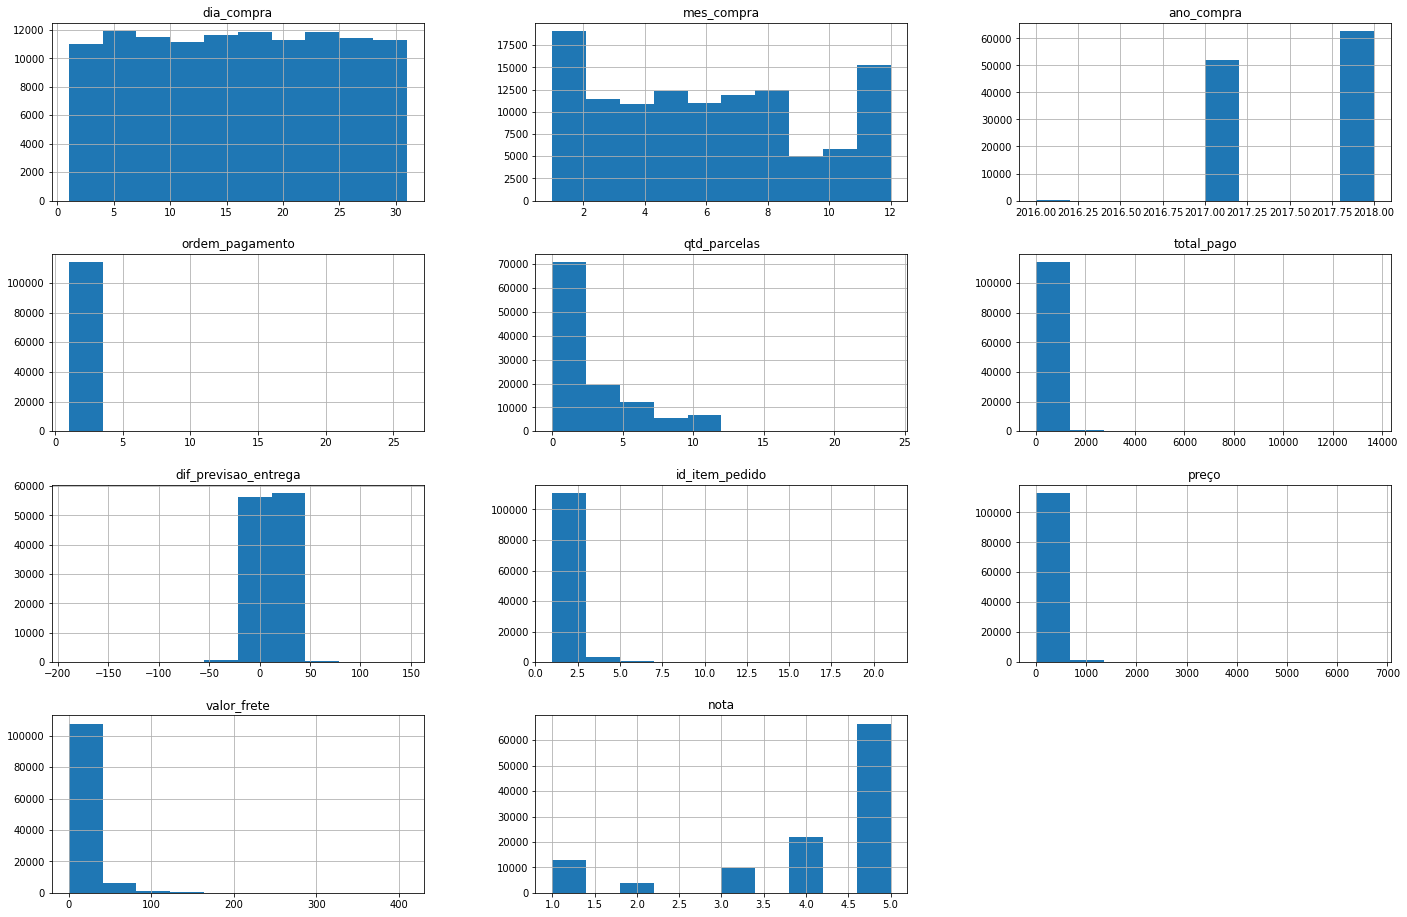

In [ ]:
data.hist(figsize=(24, 16))

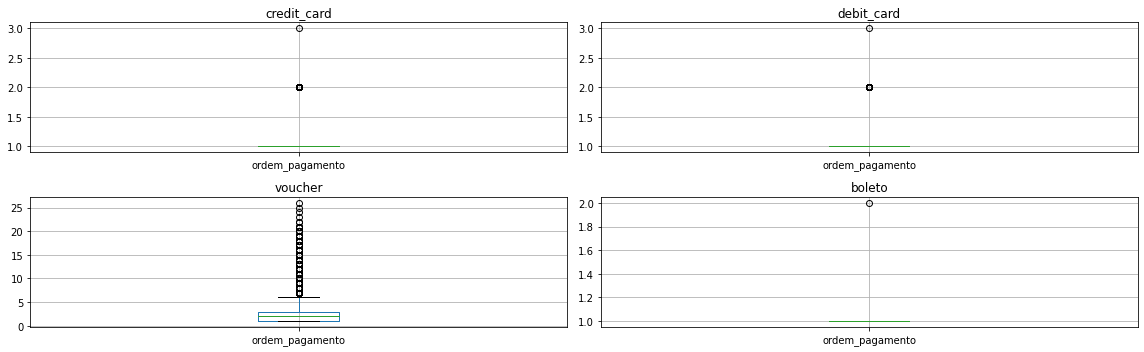

In [ ]:
fig = plt.figure(figsize = (16,5))

ax1 = fig.add_subplot(2,2,1)
ax1 = data[data['tipo_pagamento']=='credit_card'].boxplot(column=['ordem_pagamento'])
ax1.set(title='credit_card')

ax2 = fig.add_subplot(2,2,2)
ax2 = data[data['tipo_pagamento']=='debit_card'].boxplot(column=['ordem_pagamento'])
ax2.set(title='debit_card')

ax3 = fig.add_subplot(2,2,3)
ax3 = data[data['tipo_pagamento']=='voucher'].boxplot(column=['ordem_pagamento'])
ax3.set(title='voucher')

ax4 = fig.add_subplot(2,2,4)
ax4 = data[data['tipo_pagamento']=='boleto'].boxplot(column=['ordem_pagamento'])
ax4.set(title='boleto')


plt.tight_layout()
plt.show()

In [ ]:
data['tipo_pagamento'].value_counts()

credit_card    84888
boleto         22347
voucher         6123
debit_card      1653
Name: tipo_pagamento, dtype: int64

Analisando os dados, percebemos que os valores discrepantes para a feature tipo_pagamento é por causa dos pagamentos via voucher. 

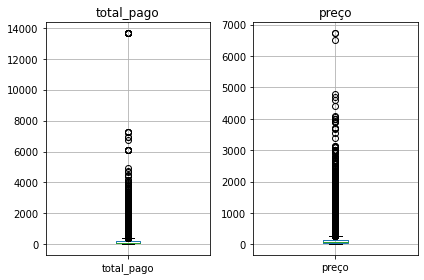

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax1 = data.boxplot(column=['total_pago'])
ax1.set(title='total_pago')

ax2 = fig.add_subplot(1,2,2)
ax2 = data.boxplot(column=['preço'])
ax2.set(title='preço')

plt.tight_layout()
plt.show()

In [ ]:
data[['total_pago','preço']].describe()

,total_pago,preço
count,115011.000000,115011.000000
mean,171.918390,120.081819
std,266.133022,183.043451
min,0.000000,0.850000
25%,60.850000,39.900000
50%,108.190000,74.900000
75%,188.940000,133.000000
max,13664.080000,6735.000000


In [ ]:
print(data[data['preço']>3000].shape)

(28, 25)


In [ ]:
data = data[data['preço']<=3000]
data[['total_pago','preço']].describe()

,total_pago,preço
count,114983.000000,114983.000000
mean,171.036772,119.118769
std,258.994284,171.611137
min,0.000000,0.850000
25%,60.850000,39.900000
50%,108.160000,74.900000
75%,188.905000,133.000000
max,13664.080000,2999.990000


Observando a distribuição dos dados da variável prço, identificamos a presença de outiliers. Com isso, definimos eliminar preços maiores que 3k

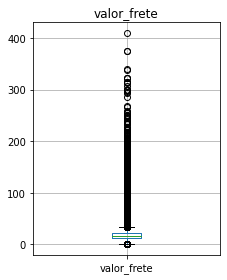

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax1 = data.boxplot(column=['valor_frete'])
ax1.set(title='valor_frete')

plt.tight_layout()
plt.show()

In [ ]:
data.valor_frete.describe()

count    114983.000000
mean         19.969445
std          15.615797
min           0.000000
25%          13.080000
50%          16.280000
75%          21.170000
max         409.680000
Name: valor_frete, dtype: float64

In [ ]:
print(data[data['valor_frete']>200].shape)

(63, 25)


In [ ]:
data = data[data['valor_frete']<=200]
data[['valor_frete','total_pago']].describe()

,valor_frete,total_pago
count,114920.000000,114920.000000
mean,19.837798,170.332946
std,14.527941,256.649872
min,0.000000,0.000000
25%,13.080000,60.850000
50%,16.280000,108.100000
75%,21.150000,188.690000
max,196.940000,13664.080000


Observando a distribuição dos dados da variável frete, identificamos a presença de outiliers. Com isso, definimos eliminar fretes maiores que 200

In [ ]:
data.shape

(114920, 25)

## Como é a distribuição dos tipos de pagamento?

In [ ]:
data.columns

Index(['id_pedido', 'status_pedido', 'dia_compra', 'mes_compra', 'ano_compra',
       'dia_semana_compra', 'mes_e_ano_compra', 'data_compra', 'hora_compra',
       'tipo_pagamento', 'ordem_pagamento', 'qtd_parcelas', 'total_pago',
       'dif_previsao_entrega', 'id_produto', 'categoria', 'id_item_pedido',
       'preço', 'valor_frete', 'nota', 'id_cliente', 'customer_unique_id',
       'cidade_cliente', 'estado_cliente', 'regiao_cliente'],
      dtype='object')

(0.0, 81664.0)

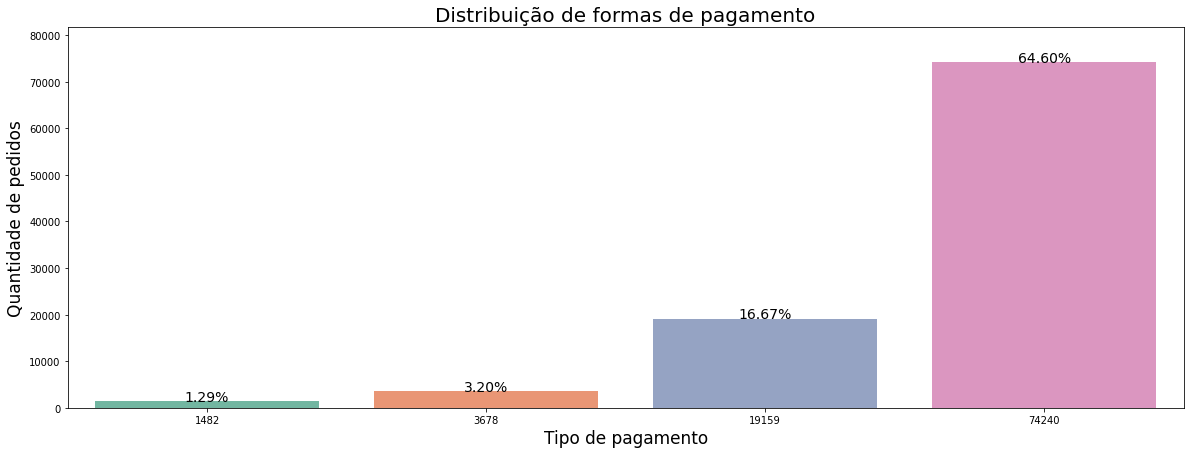

In [ ]:
plt.figure(figsize=(20,7))
#sns.countplot(x='tipo_pagamento', data=data, palette='Set2')
plt.subplot(111)

totalPedidosTipoPagamento = data.groupby('tipo_pagamento')['id_pedido'].nunique().sort_values(ascending=False)
totalPedidosTipoPagamento
total = len(data)
g = sns.barplot(x=totalPedidosTipoPagamento.index, y=totalPedidosTipoPagamento, data=totalPedidosTipoPagamento, palette='Set2')
g.set_title("Distribuição de formas de pagamento", fontsize=20)
g.set_xlabel("Tipo de pagamento", fontsize=17)
g.set_ylabel("Quantidade de pedidos", fontsize=17)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.1)

(0.0, 52294.00000000001)

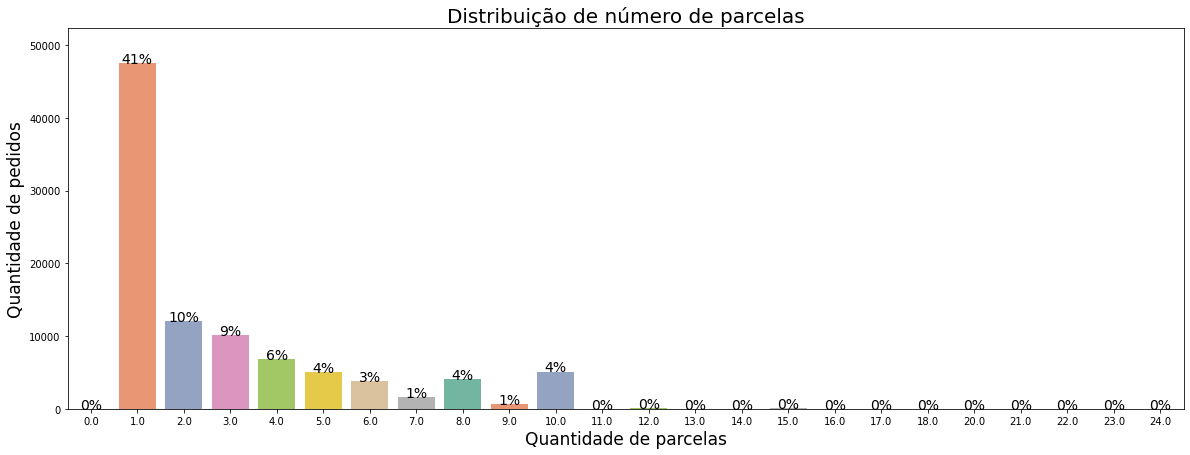

In [ ]:
plt.figure(figsize=(20,7))
#sns.countplot(x='tipo_pagamento', data=data, palette='Set2')
plt.subplot(111)

totalQtdParcelas = data.groupby('qtd_parcelas')['id_pedido'].nunique().sort_values(ascending=False)
totalQtdParcelas
g = sns.barplot(x=totalQtdParcelas.index, y=totalQtdParcelas, data=data, palette='Set2')
g.set_title("Distribuição de número de parcelas", fontsize=20)
g.set_xlabel("Quantidade de parcelas", fontsize=17)
g.set_ylabel("Quantidade de pedidos", fontsize=17)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.1)

Mais de 60% dos pedidos entregues foram pagos utilizando como método de pagamento o cartão de crédito. E cerca de 40% foram feitas sem parcelamento.

## Qual a categoria de produtos mais rentável do período analisado?

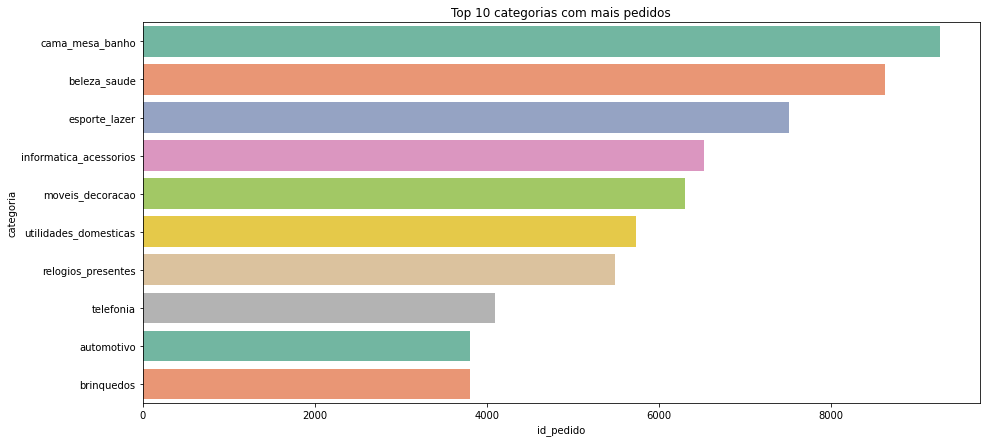

In [ ]:
produtos_mais_vendidos = data.groupby('categoria')['id_pedido'].nunique().sort_values(ascending=False).head(10)
produtos_mais_vendidos

#produtos_mais_vendidos = data['categoria'].value_counts().head(10)

plt.figure(figsize=(15,7))
plt.title('Top 10 categorias com mais pedidos')
sns.barplot(y=produtos_mais_vendidos.index, x=produtos_mais_vendidos, palette="Set2")

In [ ]:
data.groupby('categoria')['id_pedido'].nunique().sort_values(ascending=False).head(10)

categoria
cama_mesa_banho           9269
beleza_saude              8632
esporte_lazer             7519
informatica_acessorios    6528
moveis_decoracao          6300
utilidades_domesticas     5736
relogios_presentes        5490
telefonia                 4092
automotivo                3806
brinquedos                3803
Name: id_pedido, dtype: int64

## Existe sazonalidade de vendas?

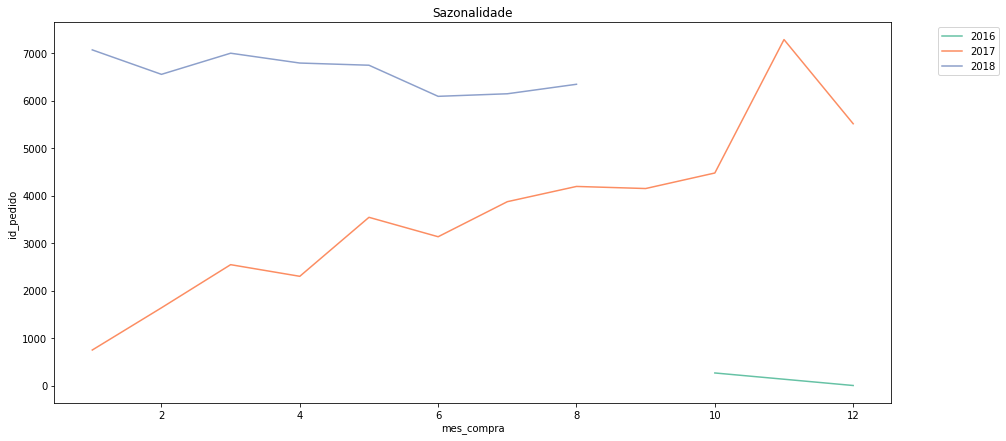

In [ ]:
plt.figure(figsize=(15,7))
sazonalidade = data.groupby(['mes_compra','ano_compra'])['id_pedido'].nunique().sort_values(ascending=True).reset_index()


sns.lineplot(data=sazonalidade, 
             x='mes_compra', 
             y='id_pedido', 
             hue='ano_compra', 
             legend='full',
             palette='Set2')
plt.title('Sazonalidade')

# Movendo a legenda para fora do box
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

(0.0, 57997.50000000001)

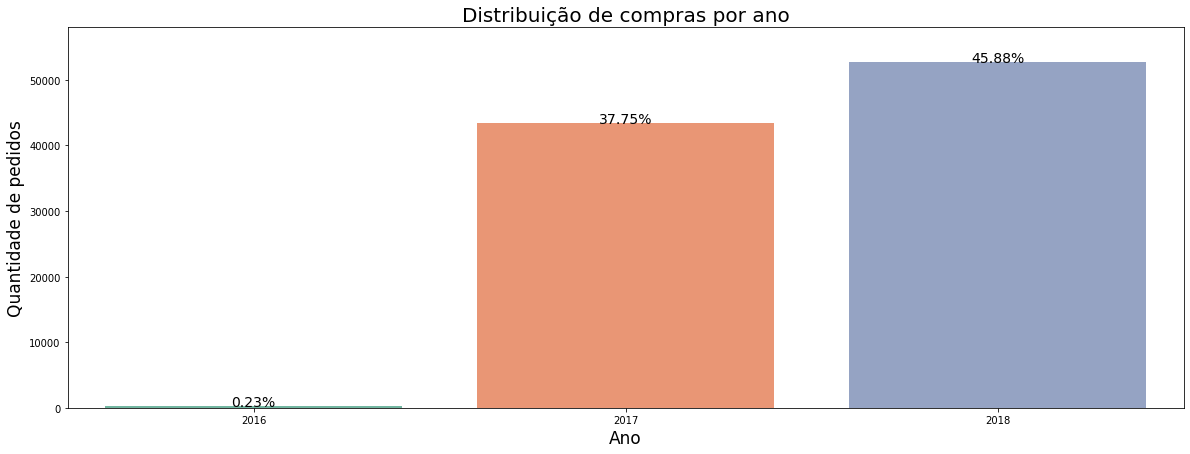

In [ ]:
plt.figure(figsize=(20,7))
#sns.countplot(x='tipo_pagamento', data=data, palette='Set2')
plt.subplot(111)
sazonalidade_ano = data.groupby(['ano_compra'])['id_pedido'].nunique().sort_values(ascending=True).reset_index()
g = sns.barplot(x='ano_compra', y='id_pedido', data=sazonalidade_ano, palette='Set2')
g.set_title("Distribuição de compras por ano", fontsize=20)
g.set_xlabel("Ano", fontsize=17)
g.set_ylabel("Quantidade de pedidos", fontsize=17)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.1)

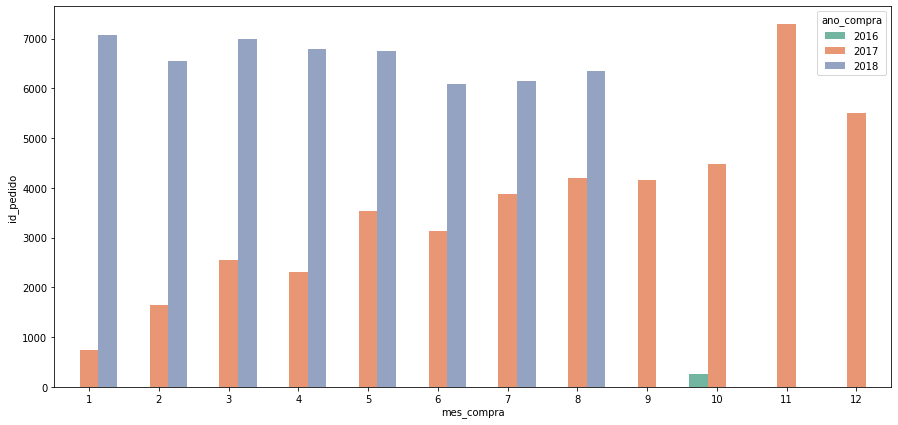

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x='mes_compra',y='id_pedido', hue='ano_compra', data=sazonalidade, palette='Set2')

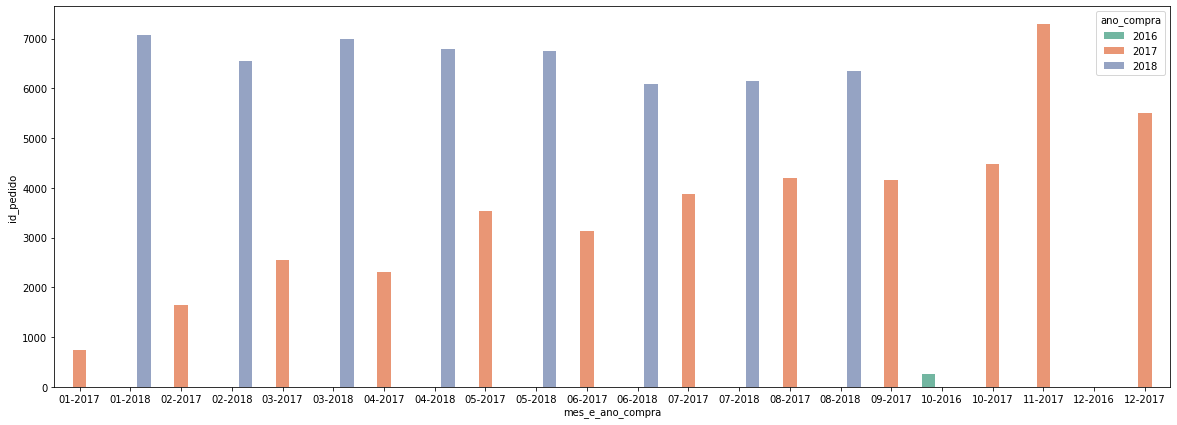

In [ ]:
plt.figure(figsize=(20,7))
sazonalidade_periodo = data.groupby(['mes_e_ano_compra','ano_compra'])['id_pedido'].nunique().reset_index()
sns.barplot(x='mes_e_ano_compra',y='id_pedido',hue='ano_compra', data=sazonalidade_periodo, order = sazonalidade_periodo['mes_e_ano_compra'], palette='Set2')

In [ ]:
data['data_compra'].max()

datetime.date(2018, 8, 29)

O ponto de destaque ocorre no mês de novembro de 2017, período em que as vendas começam a aumentar significadamente em relação aos outros períodos. O total de vendas teve um crescimento de 8% de 2018 em relação ao ano anterior. (Levando em consideração que o último registro da base é com a data de 29 de agosto de 2018)


## Existe diferença de vendas por dia da semana? 

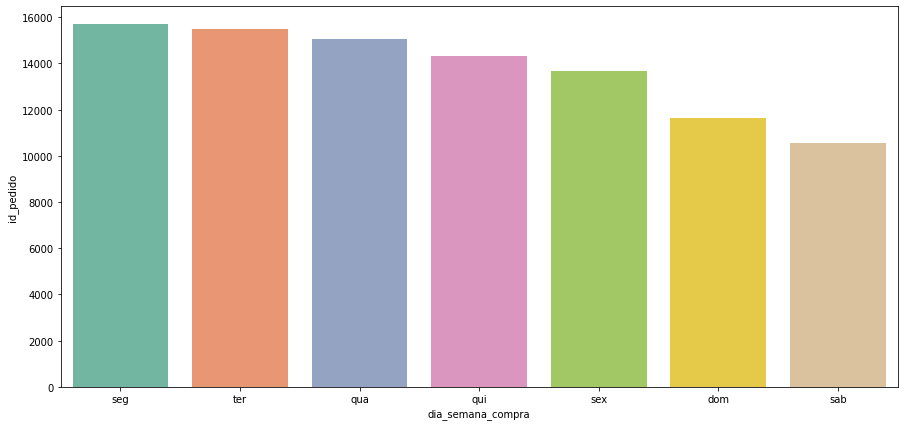

In [ ]:
plt.figure(figsize=(15,7))
sazonalidade_semana = data.groupby(['dia_semana_compra'])['id_pedido'].nunique().sort_values(ascending=False).reset_index()
sns.barplot(x='dia_semana_compra',y='id_pedido', data=sazonalidade_semana, palette='Set2')


## Algum período do dia costuma ter mais vendas? 

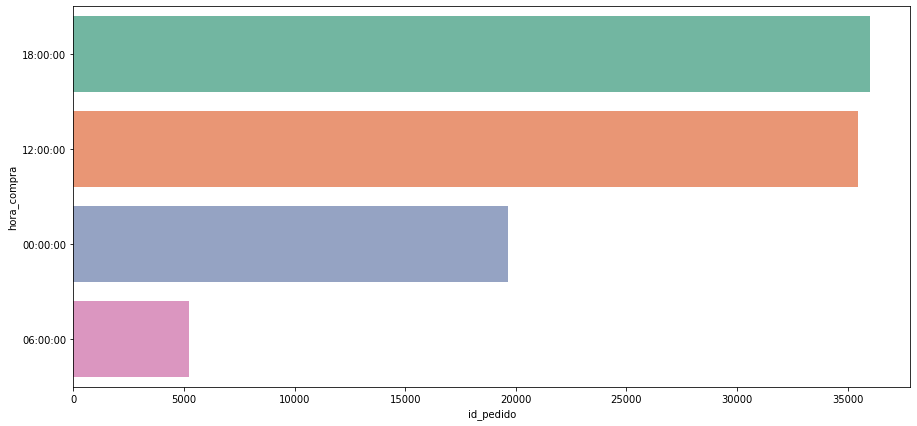

In [ ]:
plt.figure(figsize=(15,7))
sazonalidade_hora = data.groupby(['hora_compra'])['id_pedido'].nunique().sort_values(ascending=False).reset_index()
sns.barplot(y='hora_compra', x='id_pedido',data=sazonalidade_hora, palette='Set2')

O fluxo de compras tende aumentar durante os dias de semana e no período da noite, entre seis da tarde e meia noite.

## Qual região do Brasil é a mais rentável?

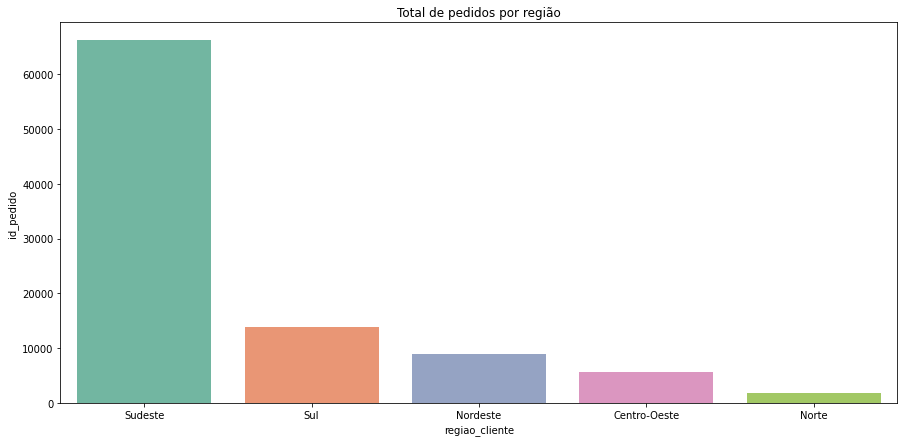

In [ ]:
total_pedidos_regiao = data.groupby('regiao_cliente')['id_pedido'].nunique().sort_values(ascending=False)
plt.figure(figsize=(15,7))
total_pedidos_regiao
plt.title('Total de pedidos por região')
sns.barplot(x=total_pedidos_regiao.index, y=total_pedidos_regiao, palette='Set2')

In [ ]:
total_por_regiao = data.groupby(['regiao_cliente','preço'])['id_pedido'].nunique().sort_values(ascending=False).reset_index()
total_por_regiao = total_por_regiao.groupby('regiao_cliente')['preço'].sum().sort_values(ascending=False).reset_index()
total_por_regiao

,regiao_cliente,preço
0,Sudeste,1191936.80
1,Sul,517289.97
2,Nordeste,467296.90
3,Centro-Oeste,304254.51
4,Norte,172364.28


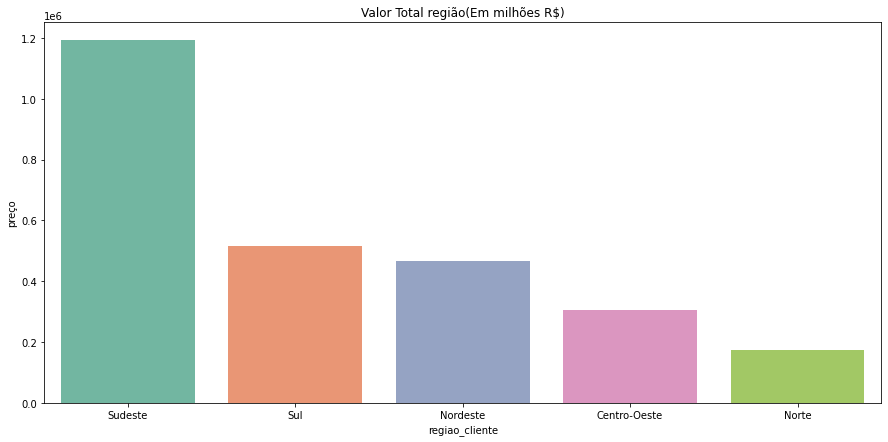

In [ ]:
plt.figure(figsize=(15,7))
plt.title('Valor Total região(Em milhões R$)')
sns.barplot(x='regiao_cliente', y='preço', data=total_por_regiao, palette='Set2')

## Qual Estado do Brasil é o mais rentável? 

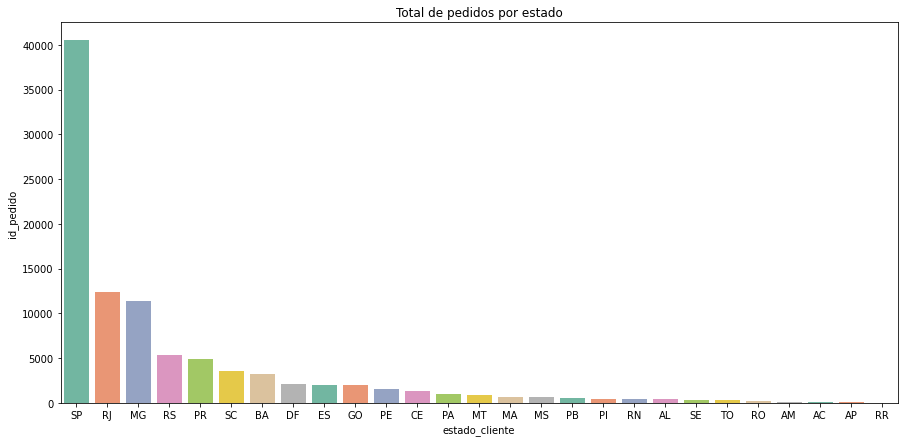

In [ ]:
total_pedidos_estado = data.groupby('estado_cliente')['id_pedido'].nunique().sort_values(ascending=False)
plt.figure(figsize=(15,7))
plt.title('Total de pedidos por estado')
sns.barplot(x=total_pedidos_estado.index, y=total_pedidos_estado, palette='Set2')

In [ ]:
total_por_estado = data.groupby(['estado_cliente','preço'])['id_pedido'].nunique().sort_values(ascending=False).reset_index()
total_por_estado = total_por_estado.groupby('estado_cliente')['preço'].sum().sort_values(ascending=False).reset_index()
total_por_estado.head(10)

,estado_cliente,preço
0,SP,893259.67
1,RJ,476991.54
2,MG,425062.49
3,RS,265944.89
4,PR,258655.74
5,SC,218255.37
6,BA,215168.06
7,DF,138954.77
8,GO,138583.39
9,PE,127574.35


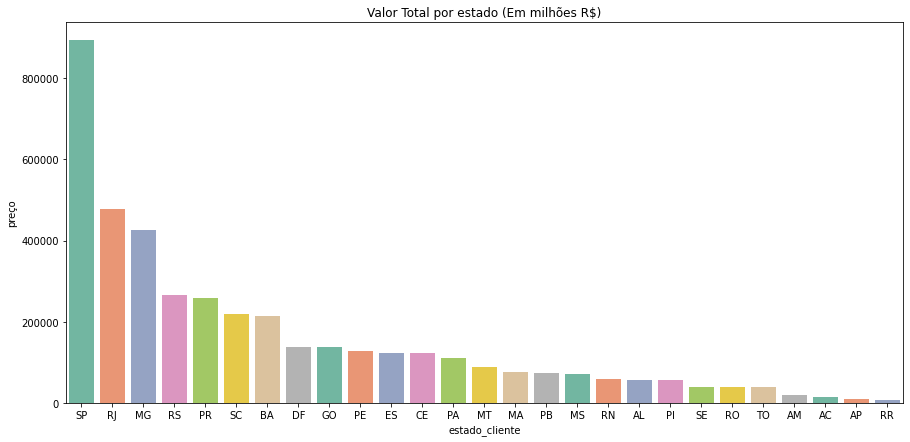

In [ ]:
plt.figure(figsize=(15,7))
plt.title('Valor Total por estado (Em milhões R$)')
sns.barplot(x='estado_cliente', y='preço',data=total_por_estado, palette='Set2')

## Qual a Cidade mais rentável? 

In [ ]:
total_por_cidade = data.groupby(['cidade_cliente','preço'])['id_pedido'].nunique().sort_values(ascending=False).reset_index()
total_por_cidade = total_por_cidade.groupby('cidade_cliente')['preço'].sum().sort_values(ascending=False).reset_index().head(10)
total_por_cidade

,cidade_cliente,preço
0,sao paulo,484113.28
1,rio de janeiro,328910.87
2,belo horizonte,153253.06
3,brasilia,138944.78
4,curitiba,113784.55
5,campinas,102884.40
6,salvador,95684.62
7,porto alegre,87044.27
8,guarulhos,74236.10
9,niteroi,66727.17


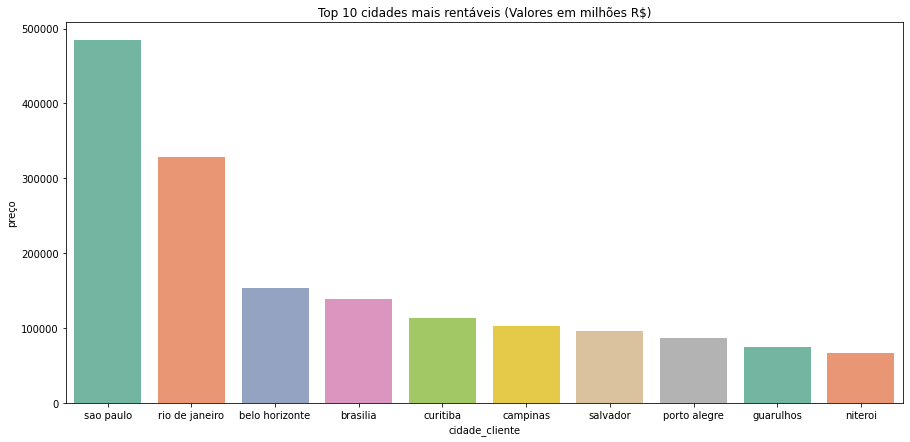

In [ ]:
plt.figure(figsize=(15,7))
plt.title('Top 10 cidades mais rentáveis (Valores em milhões R$)')
sns.barplot(x='cidade_cliente', y='preço',data=total_por_cidade, palette='Set2')

A região que realiza mais pedidos e também gasta mais é a Região Sudeste, em destaque estão os estados de São Paulo, Rio de Janeiro e Minas Gerais. Entre as cidades, capitais dos estados ganham destaque.

## Quais os produtos mais rentaveis?

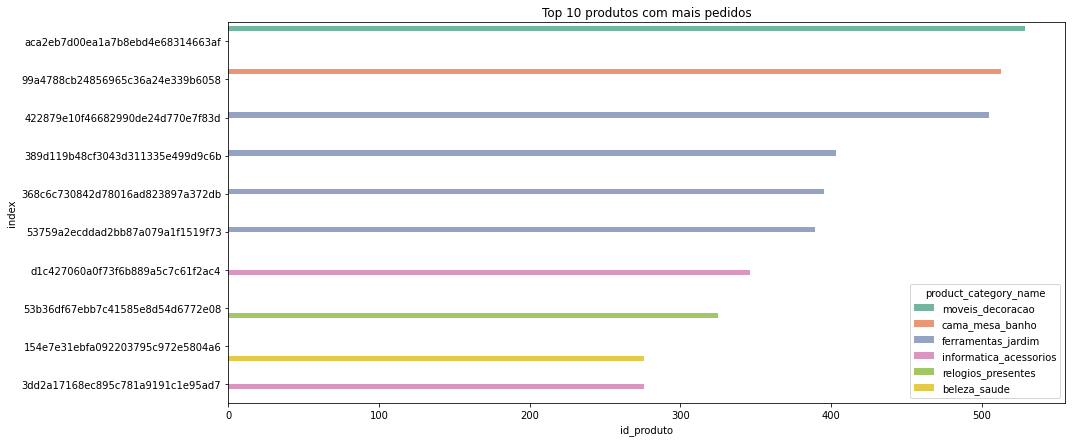

In [ ]:
produtos_mais_procurados = data['id_produto'].value_counts().reset_index().head(10)
data__products.rename(columns={'product_id': 'index'}, inplace = True)
produtos_mais_procurados = pd.merge(produtos_mais_procurados,data__products, on='index', how='inner')
#data__products.head(10)
#produtos_mais_procurados.head(10)
plt.figure(figsize=(15,7))
plt.title('Top 10 produtos com mais pedidos')
sns.barplot( x=produtos_mais_procurados['id_produto'],y=produtos_mais_procurados['index'], hue=produtos_mais_procurados['product_category_name'], palette="Set2")

O produto que recebeu o maior número de pedidos pertence à categoria de móveis e decoração, com mais de 500 itens vendidos.

## Quais as categorias mais rentáveis por região?

In [ ]:
total_regiao = data.groupby(['regiao_cliente','preço','categoria','id_produto'])['id_pedido'].nunique().sort_values(ascending=False).reset_index()
produtos_rentaveis_regiao=total_regiao.groupby(['regiao_cliente','categoria']).agg({'preço': np.sum, 'id_produto': np.size},'qtd').reset_index()
produtos_rentaveis_regiao.sample(10)
produtos_rentaveis_regiao.rename(columns={'id_produto': 'qtd_produto'}, inplace = True)

produtos_rentaveis_sudeste= produtos_rentaveis_regiao.loc[produtos_rentaveis_regiao['regiao_cliente']=='Sudeste']
produtos_rentaveis_sudeste=produtos_rentaveis_sudeste.sort_values('preço', ascending=False).head(5)


produtos_rentaveis_centroOeste= produtos_rentaveis_regiao.loc[produtos_rentaveis_regiao['regiao_cliente']=='Centro-Oeste']
produtos_rentaveis_centroOeste=produtos_rentaveis_centroOeste.sort_values('preço', ascending=False).head(5)


produtos_rentaveis_sul= produtos_rentaveis_regiao.loc[produtos_rentaveis_regiao['regiao_cliente']=='Sul']
produtos_rentaveis_sul=produtos_rentaveis_sul.sort_values('preço', ascending=False).head(5)


produtos_rentaveis_norte= produtos_rentaveis_regiao.loc[produtos_rentaveis_regiao['regiao_cliente']=='Norte']
produtos_rentaveis_norte=produtos_rentaveis_norte.sort_values('preço', ascending=False).head(5)


produtos_rentaveis_nordeste= produtos_rentaveis_regiao.loc[produtos_rentaveis_regiao['regiao_cliente']=='Nordeste']
produtos_rentaveis_nordeste=produtos_rentaveis_nordeste.sort_values('preço', ascending=False).head(5)
#plt.figure(figsize=(15,7))
#plt.title('Top 5 ')
#sns.barplot(y="preço",x="categoria",hue="regiao_cliente", palette="Set2", data=produtos_rentaveis_nordeste)



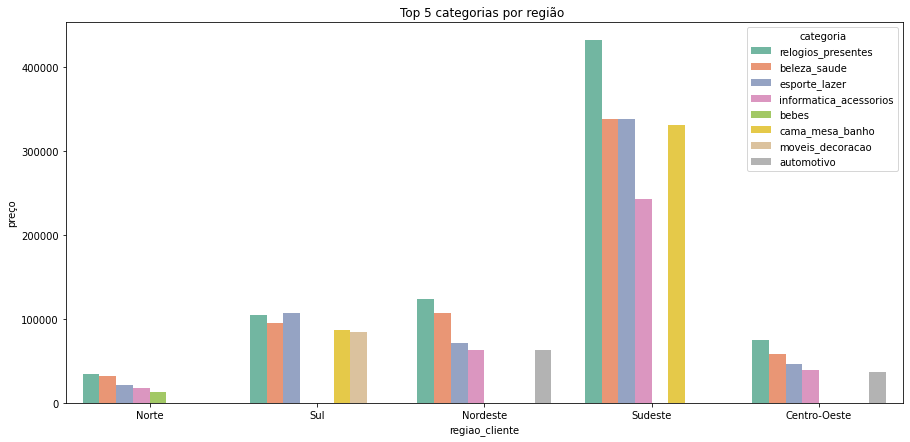

In [ ]:
produtos_rentaveis_regiao= pd.concat([produtos_rentaveis_norte, produtos_rentaveis_sul,produtos_rentaveis_nordeste,produtos_rentaveis_sudeste,produtos_rentaveis_centroOeste])
plt.figure(figsize=(15,7))
plt.title('Top 5 categorias por região ')
sns.barplot(y="preço",x="regiao_cliente",hue="categoria",palette="Set2", data=produtos_rentaveis_regiao)

O comportamento de compra se altera por região. Foi possível identificar, por exemplo, que clientes do sul gastam mais em produtos de móveis e decoração, clientes do norte e nordeste gastam mais pela categoria de beleza e saúde, clientes do centro-oeste gastam mais em relógios e presentes e a região sudeste comprou mais itens de cama mesa e banho.
Tudo isto, levando em consideração também o frete.


## Qual o valor médio dos produtos? 

In [ ]:
data.agg({'preço': np.mean})

preço    118.750703
dtype: float64

## Qual o valor médio dos fretes? 

In [ ]:
data.agg({'valor_frete': np.mean})

valor_frete    19.837798
dtype: float64

## Os clientes geralmente ficam satisfeitos com as compras?

In [ ]:
data__order_reviews.head()

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5


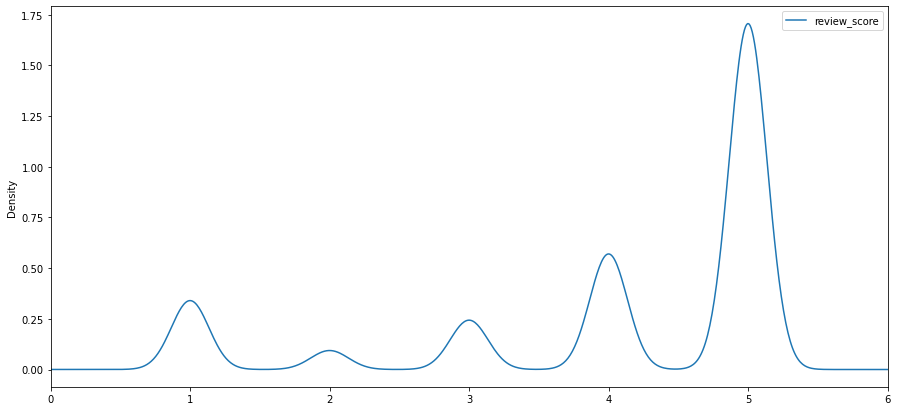

In [ ]:
data__order_reviews.plot.density(y='review_score',xlim=[0,6],figsize=[15,7])

A maioria dos clientes deram notas positivas e ficaram satisfeitos com suas compras na Olist.

## Existe recorrência de compra? 

In [ ]:
data.columns

Index(['id_pedido', 'status_pedido', 'dia_compra', 'mes_compra', 'ano_compra',
       'dia_semana_compra', 'mes_e_ano_compra', 'data_compra', 'hora_compra',
       'tipo_pagamento', 'ordem_pagamento', 'qtd_parcelas', 'total_pago',
       'dif_previsao_entrega', 'id_produto', 'categoria', 'id_item_pedido',
       'preço', 'valor_frete', 'nota', 'id_cliente', 'customer_unique_id',
       'cidade_cliente', 'estado_cliente', 'regiao_cliente'],
      dtype='object')

In [ ]:
max_date = max(data['data_compra']) + datetime.timedelta(days=1)

In [ ]:
recorrencia = data.groupby(['customer_unique_id','data_compra','id_cliente','preço'])['id_pedido'].nunique().sort_values(ascending=False).reset_index()
recorrencia = recorrencia.groupby(['customer_unique_id']).agg({
    'data_compra': lambda x: (max_date - x.max()).days,
    'id_cliente':'count',
    'preço':'sum'
}).reset_index()
#Compra recente faz um comparativo com a ultima data que temos na base, e verifica quanto tempo a compra foi feita
#a partir desta data. Exemplo, compra recente - 112, esta compra foi feita 112 dias antes da última data que 
#temos na base
recorrencia.columns =['id_cliente','recencia','frequencia','valor_gasto']
recorrencia.head()
#Frequencia é o numero de vezes que um mesmo cliente fez compras na loja, independente da quantidade de itens. 
#Sendo o máximo, 42
#75 é o numero maximo de itens do carrinho na base

,id_cliente,recencia,frequencia,valor_gasto
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
2,0000f46a3911fa3c0805444483337064,538,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,289,1,180.00


In [ ]:
#Verificação de valores faltantes
print(recorrencia.shape[0],recorrencia[recorrencia['frequencia']>1].shape[0])
recorrencia.isnull().sum().sort_values(ascending=False)

93260 4896


id_cliente     0
recencia       0
frequencia     0
valor_gasto    0
dtype: int64

5.249839159339481
count    93260.000000
mean         1.061055
std          0.288132
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         15.000000
Name: frequencia, dtype: float64


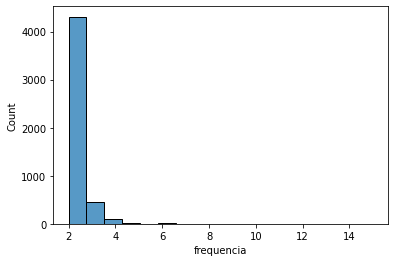

In [ ]:
print(recorrencia[recorrencia['frequencia']>1].shape[0] / recorrencia.shape[0]*100)
print(recorrencia['frequencia'].describe())
sns.histplot(x='frequencia', data=recorrencia[recorrencia['frequencia']>1],bins=17)
data['recencia']=recorrencia['recencia']
data['frequencia']=recorrencia['valor_gasto']

Como pudemos ver, cerca de 5% dos compradores fizeram mais de uma compra no e-commerce, com clientes que fizeram até 22 compras no período analisado.

## Os clientes que fazem mais compras são os que gastam mais? 

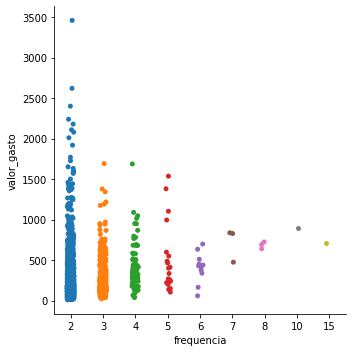

In [ ]:
clientes_freq =recorrencia.loc[recorrencia['frequencia']>1].sort_values('valor_gasto', ascending=False)
clientes_sem_freq = recorrencia.loc[recorrencia['frequencia']==1].sort_values('valor_gasto', ascending=False).head(5)                                  

sns.catplot(y="valor_gasto",x="frequencia", data=clientes_freq)

##  Qual o prazo médio de dias entre compra e entrega?

count    114920.000000
mean         11.040263
std          10.161005
min        -189.000000
25%           6.000000
50%          12.000000
75%          16.000000
max         146.000000
Name: dif_previsao_entrega, dtype: float64


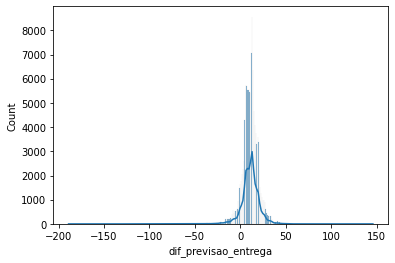

In [ ]:
print(data['dif_previsao_entrega'].describe())
sns.histplot(x='dif_previsao_entrega', data=data, kde=True, palette='Set2')
#Fazer scatter


Os produtos levam em média 12 dias a menos do que a data prevista para a entrega

## O preço influencia no número das parcelas?

In [ ]:
data.head(2)

,id_pedido,status_pedido,dia_compra,mes_compra,ano_compra,dia_semana_compra,mes_e_ano_compra,data_compra,hora_compra,tipo_pagamento,ordem_pagamento,qtd_parcelas,total_pago,dif_previsao_entrega,id_produto,categoria,id_item_pedido,preço,valor_frete,nota,id_cliente,customer_unique_id,cidade_cliente,estado_cliente,regiao_cliente,recencia,frequencia
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2,10,2017,seg,10-2017,2017-10-02,12:00:00,credit_card,1.0,1.0,18.12,7,87285b34884572647811a353c7ac498a,utilidades_domesticas,1,29.99,8.72,4.0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,Sudeste,112.0,129.9
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2,10,2017,seg,10-2017,2017-10-02,12:00:00,voucher,3.0,1.0,2.00,7,87285b34884572647811a353c7ac498a,utilidades_domesticas,1,29.99,8.72,4.0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,Sudeste,115.0,18.9


In [ ]:
total_influencia_parcelas = data.groupby(['id_cliente','tipo_pagamento','mes_compra','qtd_parcelas','preço'])['id_pedido'].nunique().sort_values(ascending=False).reset_index()
total_influencia_parcelas=total_influencia_parcelas.groupby(['id_cliente','tipo_pagamento','mes_compra']).agg({'preço':'sum','qtd_parcelas':'sum'}).reset_index()
total_influencia_parcelas.head()

,id_cliente,tipo_pagamento,mes_compra,preço,qtd_parcelas
0,00012a2ce6f8dcda20d059ce98491703,credit_card,11,89.80,8.0
1,000161a058600d5901f007fab4c27140,credit_card,7,54.90,5.0
2,0001fd6190edaaf884bcaf3d49edf079,credit_card,2,179.99,10.0
3,0002414f95344307404f0ace7a26f1d5,boleto,8,149.90,1.0
4,000379cdec625522490c315e70c7a9fb,boleto,4,93.00,1.0


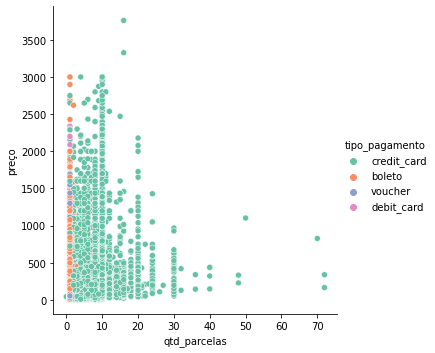

In [ ]:
sns.relplot(y="preço",x="qtd_parcelas",hue="tipo_pagamento",sizes=(15,300), data=total_influencia_parcelas,palette='Set2')

## O Tipo de pagamento influencia na sazonalidade (Se existente) das vendas?

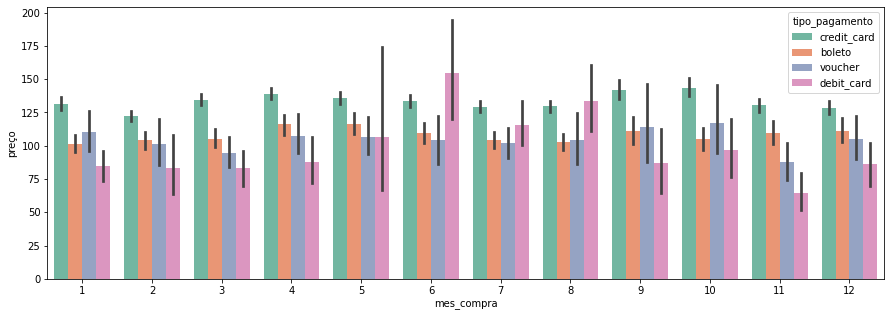

In [ ]:
plt.figure(figsize=(15,5))

sns.barplot(x='mes_compra',y='preço', hue='tipo_pagamento', data=total_influencia_parcelas, palette='Set2')
#Gráfico enviesado, pois a base de 2018 vai somente até agosto de 2018.

Como mostra o gráfico, a maioria das pessoas utiliza o cartão de crédito como meio de pagamento. Existe uma tendência de aumento de pagamentos feitos por cartão de crédito no primeiro trimestre do ano.

## Os clientes costumam fazer compras com mais de um item no pedido?

In [ ]:
data['qtd_itens'] = data['id_item_pedido'].copy()
data.loc[data['id_item_pedido'].isin([2,3,4,5,6]), 'qtd_itens'] = 'de 2 a 6' # analisar como pegar o item 1 pra agrupar aqui qndo tem mais itens
data.loc[data['id_item_pedido'].isin([7,8,9,10]), 'qtd_itens'] = 'de 7 a 10'
data.loc[(data['id_item_pedido'] > 10), 'qtd_itens'] = 'de 10 a 20'

(0.0, 110717.20000000001)

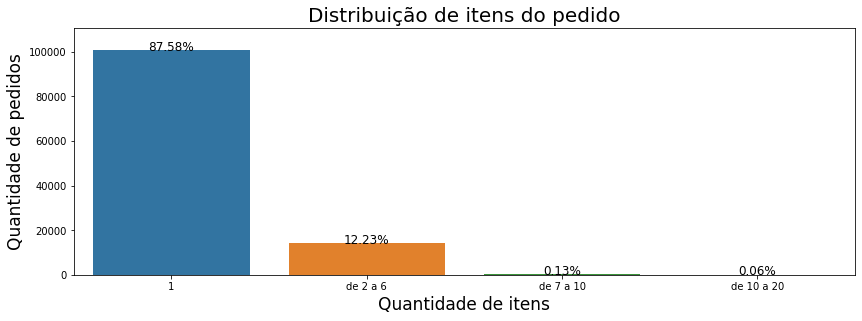

In [ ]:
plt.figure(figsize=(14,10))

plt.subplot(211)
g = sns.countplot(x='qtd_itens', data=data)
g.set_title("Distribuição de itens do pedido", fontsize=20)
g.set_xlabel("Quantidade de itens", fontsize=17)
g.set_ylabel("Quantidade de pedidos", fontsize=17)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.1)

Mais de 80% dos pedidos com status de 'Entregue' possuiam apenas um item no carrinho.

## O Valor do frete sofre influência pelo Estado/Região? 

In [ ]:

fig = px.line_polar(data, r=data['valor_frete'], theta='regiao_cliente', 
                    title='Polar seasonal plot',
                    width=600, height=600)
fig.update_polars(angularaxis_type="category") 
fig.show()

As regiões que tiveram os valores de frete mais caros foram o nordeste e o sul.

In [ ]:
#Salvando a tabela original
data_df = data

In [ ]:
df_data=data

In [ ]:
df_data = data.groupby(['mes_e_ano_compra']).agg({
    'qtd_parcelas':'mean',
    'dif_previsao_entrega':'mean',
    'valor_frete':'sum',
    'recencia':'mean',
    'frequencia':'mean',
    'preço':'sum',
    'id_pedido':'nunique',
    'customer_unique_id':'nunique',
    'ordem_pagamento':'nunique'
}).reset_index()
df_data.head()

,mes_e_ano_compra,qtd_parcelas,dif_previsao_entrega,valor_frete,recencia,frequencia,preço,id_pedido,customer_unique_id,ordem_pagamento
0,01-2017,2.969823,26.849116,16596.90,236.080873,132.683299,120037.59,748,716,11
1,01-2018,2.691185,12.045090,159255.77,239.115754,129.372166,955643.87,7067,6972,7
2,02-2017,2.817995,18.100257,38731.78,237.796815,124.667127,226378.31,1637,1614,11
3,02-2018,2.705284,7.412113,143656.19,244.486358,129.502876,856125.42,6552,6397,12
4,03-2017,2.953526,11.391940,58742.05,232.619160,126.527393,377305.69,2545,2507,13


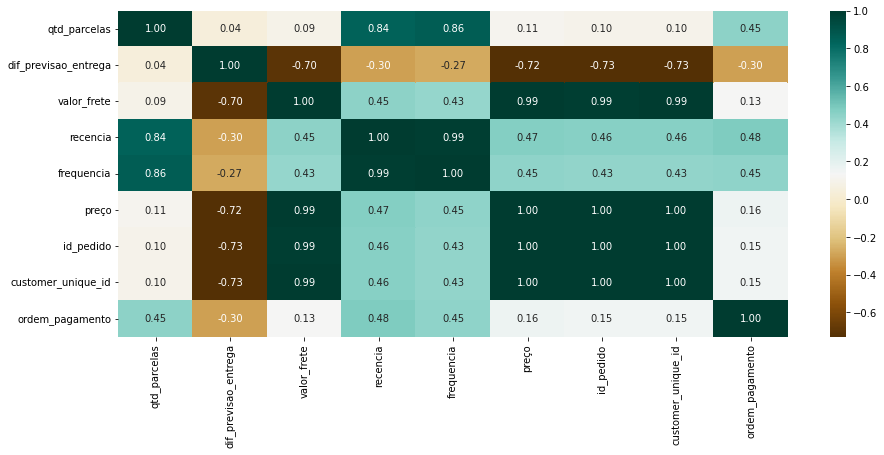

In [ ]:
plt.figure(figsize=(15, 6))
sns.heatmap(df_data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='BrBG')
plt.show()

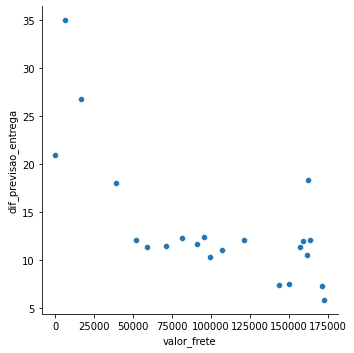

In [ ]:
sns.relplot(y="dif_previsao_entrega",x="valor_frete",sizes=(20,30), data=df_data,palette='Set2')

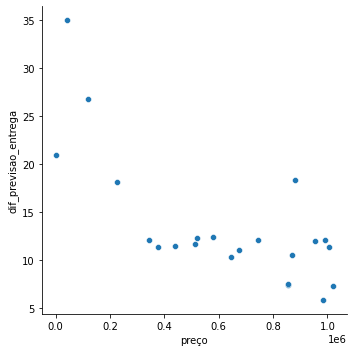

In [ ]:
sns.relplot(y="dif_previsao_entrega",x="preço",sizes=(20,30), data=df_data,palette='Set2')

## Segmentação de Clientes - Método RFM

Existe um problema de negócio que é enfrentado pela maioria das empresas, que é a baixa taxa de conversão de vendas para os seus produtos. 
Os clientes estão em diferentes momentos da vida, e tem necessidades diferentes. Para otimizar a comunicação com o público de maneira personalizada e mais assertiva, uma das estratégias que a ciência de dados utiliza é a segmentação de clientes.


Para a segmentação de clientes, será utilizado o poderoso modelo chamado RFM, que se baseia nos atributos a seguir:
- Recência : Tempo desde a última compra do cliente
- Frequência : Quantidade de compras que o cliente fez
- Monetização : Total gasto por este cliente


# Questões para tentar responder

### Quais clientes tem a probabilidade de gastar mais nos próximos 90 dias?
### Quais clientes fizeram compras recentes são improváveis de comprar novamente?
### Quais clientes tiveram previsão de compra, mas não compraram



In [ ]:
recorrencia.head()

,id_cliente,recencia,frequencia,valor_gasto
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
2,0000f46a3911fa3c0805444483337064,538,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,289,1,180.00


In [ ]:
df = recorrencia

In [ ]:
def k_means_group(data, n_clusters, random_state, asc=False, standard_tranf=False):

  #data = base de dados, 
  #n_clusters = número de clusters,
  #random_state = dados aleatóris (quando setado em um valor fixo, impede que a amostra se altere ao rodar o código novamente)
    
        
    #Colocando as variáveis na mesma escala - padronização
    if standard_tranf:
        scaler = StandardScaler()
        data_temp = scaler.fit_transform(data)
        
    #Atribuindo algorítimo KMeans a uma variável
    kmeans_sel = KMeans(n_clusters=n_clusters, random_state=random_state).fit(data)
    
    #Inserindo número do cluster na tabela
    cluster_group = data.assign(cluster = kmeans_sel.labels_)
    
    mean_group = cluster_group.groupby('cluster').mean().reset_index()
    mean_group = mean_group.sort_values(by=mean_group.columns[1],ascending=asc)
    mean_group['cluster_set'] = [i for i in range(n_clusters, 0, -1) ]
    
    cluster_map = mean_group.set_index('cluster').to_dict()['cluster_set']
    
    return cluster_group['cluster'].map(cluster_map)

In [ ]:
r_labels = k_means_group(recorrencia[['recencia']],5,1,asc=True)
f_labels = k_means_group(recorrencia[['frequencia']],5,1)
m_labels = k_means_group(recorrencia[['valor_gasto']],5,1)

df = df.assign(R = r_labels, F = f_labels, M = m_labels) 

In [ ]:
df.head()

,id_cliente,recencia,frequencia,valor_gasto,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,4,1,1
2,0000f46a3911fa3c0805444483337064,538,1,69.00,1,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,25.99,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,289,1,180.00,3,1,2


In [ ]:
def get_segment(data):
  mean_fm = (data['F'] + data['M']) / 2
  if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 4 and mean_fm <= 5):
    return 'Champions'
  if (data['R'] >= 2 and data['R'] <= 5) and (mean_fm >= 3 and mean_fm <= 5):
      return 'Loyal Customers'
  if (data['R'] >= 3 and data['R'] <= 5) and (mean_fm >= 1 and mean_fm <= 3):
      return 'Potential Loyslist'
  if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 0 and mean_fm <= 1):
      return 'New Customers'
  if (data['R'] >= 3 and data['R'] <= 4) and (mean_fm >= 0 and mean_fm <= 1):
      return 'Promising'
  if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 2 and mean_fm <= 3):
      return 'Customer Needing Attention'
  if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 0 and mean_fm <= 2):
      return 'About to Sleep'
  if (data['R'] >= 0 and data['R'] <= 2) and (mean_fm >= 2 and mean_fm <= 5):
      return 'At Risk'
  if (data['R'] >= 0 and data['R'] <= 1) and (mean_fm >= 4 and mean_fm <= 5):
      return "Can't Lose Then"
  if (data['R'] >= 1 and data['R'] <= 2) and (mean_fm >= 1 and mean_fm <= 2):
      return 'Hibernating'
  return 'Lost'

In [ ]:
df['segmento'] = df.apply(get_segment,axis=1)

#Clusterização - Parte 2

Agrupamento Manual

In [ ]:
recencia = recorrencia.iloc[:,1].values
frequencia = recorrencia.iloc[:,2].values
valor_gasto = recorrencia.iloc[:,3].values

In [ ]:
recencia

array([112, 115, 538, ..., 569, 120, 485])

In [ ]:
df_cluster = recorrencia[['id_cliente']]

In [ ]:
def gerar_cluster(data, n_clusters,df,asc=False):

  data = data.reshape(-1, 1)
#Padronizando os dados
 # scaler = StandardScaler()

 # data_temp = scaler.fit_transform(data)

  kmeans_df = KMeans(n_clusters=n_clusters, random_state=1)

  rotulos = kmeans_df.fit_predict(data)

  data_temp1 = np.column_stack((df, rotulos))
  data_temp1 = pd.DataFrame(data_temp1)

  return data_temp1



In [ ]:
df_recencia = gerar_cluster(recencia,5,df_cluster,)
df_recencia.columns =['id_cliente','R']

df_frequencia = gerar_cluster(frequencia,5,df_cluster)
df_frequencia.columns =['id_cliente','F']

df_valor_gasto = gerar_cluster(valor_gasto,5,df_cluster)
df_valor_gasto.columns =['id_cliente','M']

In [ ]:
df_recencia

,id_cliente,R
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,3
3,0000f6ccb0745a6a4b88665a16c9f078,0
4,0004aac84e0df4da2b147fca70cf8255,2
...,...,...
93255,fffbf87b7a1a6fa8b03f081c5f51a201,2
93256,fffea47cd6d3cc0a88bd621562a9d061,2
93257,ffff371b4d645b6ecea244b27531430a,3
93258,ffff5962728ec6157033ef9805bacc48,1


In [ ]:
recorrencia

,id_cliente,recencia,frequencia,valor_gasto
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
2,0000f46a3911fa3c0805444483337064,538,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,289,1,180.00
...,...,...,...,...
93255,fffbf87b7a1a6fa8b03f081c5f51a201,246,1,149.00
93256,fffea47cd6d3cc0a88bd621562a9d061,263,1,64.89
93257,ffff371b4d645b6ecea244b27531430a,569,1,89.90
93258,ffff5962728ec6157033ef9805bacc48,120,1,115.00


In [ ]:
data_cluster = pd.merge(df_cluster,df_recencia, on='id_cliente',how='left')
data_cluster = pd.merge(data_cluster,df_frequencia, on='id_cliente',how='left')
data_cluster = pd.merge(data_cluster,df_valor_gasto, on='id_cliente',how='left')
data_cluster = pd.merge(data_cluster,recorrencia,on='id_cliente',how='left')
data_cluster.sample(10)

,id_cliente,R,F,M,recencia,frequencia,valor_gasto
10397,1c49243af5ccc77a2b0547b120a3b7d5,3,0,4,556,1,119.99
23152,3f49672ff3e595ac503ff3929862a3a3,3,0,4,468,1,169.00
80792,dd6a750c92768a89a7d9c5e819df852a,2,0,0,220,1,49.90
7101,13571a3dd2ccd4feaf52d0b4ef0d1195,3,0,1,568,1,599.00
11680,1fe07e5b013e950aa1fb7a3b5bd8db95,0,0,0,446,1,99.00
2568,0707757dcd8c22ace18aec1fe28f97dd,0,0,4,389,1,159.90
11877,2077f7ec37df79c62cc24b7b8f30e8c9,4,0,0,60,1,79.00
85286,e9e132f365108a6d8aef6a343819c779,0,0,0,326,1,18.99
27692,4beb171d402535985ed8f5843bcc8dd0,4,0,0,40,1,29.00
41506,71b19f07ea0076597717c34541350ba4,2,0,4,268,1,130.00


In [ ]:
data_cluster['R'] = data_cluster['R'].astype('int64')
data_cluster['F'] = data_cluster['F'].astype('int64')
data_cluster['M'] = data_cluster['M'].astype('int64')

In [ ]:
grupo = data_cluster.groupby('R')['recencia'].describe().reset_index()
grupo = grupo.sort_values(by=grupo.columns[0],ascending=True)
grupo

,R,count,mean,std,min,25%,50%,75%,max
0,0,15374.0,379.698192,35.522775,321.0,349.0,379.0,409.0,446.0
1,1,24285.0,152.724068,30.910986,101.0,125.0,153.0,180.0,206.0
2,2,22490.0,260.862872,31.395501,207.0,232.0,265.0,282.0,320.0
3,3,11472.0,511.995293,48.723797,447.0,472.0,505.5,542.0,696.0
4,4,19639.0,48.528286,27.154203,1.0,25.0,44.0,72.0,100.0


In [ ]:
#Ordem correta de R 4-1-2-0-3

data_cluster['R']=data_cluster['R'].replace([4], 5)
data_cluster['R']=data_cluster['R'].replace([1], 4)
data_cluster['R']=data_cluster['R'].replace([2], 8)
data_cluster['R']=data_cluster['R'].replace([0], 2)
data_cluster['R']=data_cluster['R'].replace([3], 1)
data_cluster['R']=data_cluster['R'].replace([8], 3)
data_cluster['R']

0        4
1        4
2        1
3        2
4        3
        ..
93255    3
93256    3
93257    1
93258    4
93259    1
Name: R, Length: 93260, dtype: int64

In [ ]:
#Ordem correta de F 3-4-2-1-0
grupo = data_cluster.groupby('F')['frequencia'].describe().reset_index()
grupo = grupo.sort_values(by=grupo.columns[0],ascending=True)
grupo

,F,count,mean,std,min,25%,50%,75%,max
0,0,88364.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1,1,4309.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
2,2,457.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
3,3,19.0,7.157895,2.192491,6.0,6.0,6.0,7.5,15.0
4,4,111.0,4.189189,0.393435,4.0,4.0,4.0,4.0,5.0


In [ ]:
data_cluster['F']=data_cluster['F'].replace([3], 5)
data_cluster['F']=data_cluster['F'].replace([2], 3)
data_cluster['F']=data_cluster['F'].replace([1], 2)
data_cluster['F']=data_cluster['F'].replace([0], 1)
data_cluster['F']

0        1
1        1
2        1
3        1
4        1
        ..
93255    1
93256    1
93257    1
93258    1
93259    1
Name: F, Length: 93260, dtype: int64

In [ ]:
grupo = data_cluster.groupby('M')['valor_gasto'].describe().reset_index()
grupo = grupo.sort_values(by=grupo.columns[0],ascending=True)
grupo

,M,count,mean,std,min,25%,50%,75%,max
0,0,59967.0,56.028356,28.267355,0.85,30.21,52.00,79.0,113.10
1,1,5798.0,412.025202,102.636975,291.50,329.90,379.99,489.0,665.56
2,2,332.0,1910.509910,400.603440,1420.00,1599.00,1849.95,2090.0,3459.00
3,3,1565.0,920.016486,207.088290,666.80,749.00,859.00,1054.0,1400.00
4,4,25598.0,169.925915,45.134650,113.23,130.00,159.00,199.0,291.00


In [ ]:
data_cluster['M']=data_cluster['M'].replace([2], 5)
data_cluster['M']=data_cluster['M'].replace([4], 2)
data_cluster['M']=data_cluster['M'].replace([3], 4)
data_cluster['M']=data_cluster['M'].replace([1], 3)
data_cluster['M']=data_cluster['M'].replace([0], 1)
data_cluster['M']

0        2
1        1
2        1
3        1
4        2
        ..
93255    2
93256    1
93257    1
93258    2
93259    1
Name: M, Length: 93260, dtype: int64

In [ ]:
data_cluster['segmento'] = data_cluster.apply(get_segment,axis=1)

In [ ]:
data_cluster.head()

,id_cliente,R,F,M,recencia,frequencia,valor_gasto,segmento
0,0000366f3b9a7992bf8c76cfdf3221e2,4,1,2,112,1,129.90,Potential Loyslist
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4,1,1,115,1,18.90,Potential Loyslist
2,0000f46a3911fa3c0805444483337064,1,1,1,538,1,69.00,Hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,2,1,1,322,1,25.99,About to Sleep
4,0004aac84e0df4da2b147fca70cf8255,3,1,2,289,1,180.00,Potential Loyslist


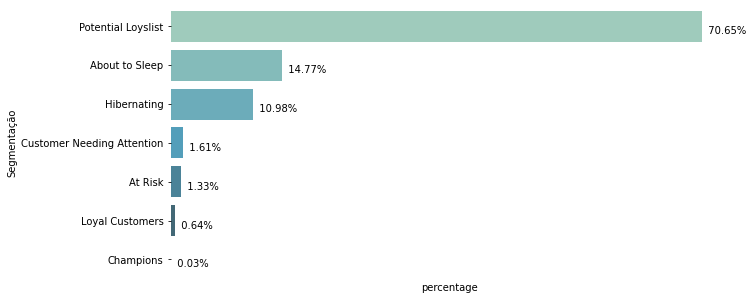

In [ ]:
plt.figure(figsize=(10,5))
percentage = (data_cluster['segmento'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="GnBu_d")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentação')
g.set(xticks=[])
plt.show()

In [ ]:
!pip install squarify
import squarify as sq

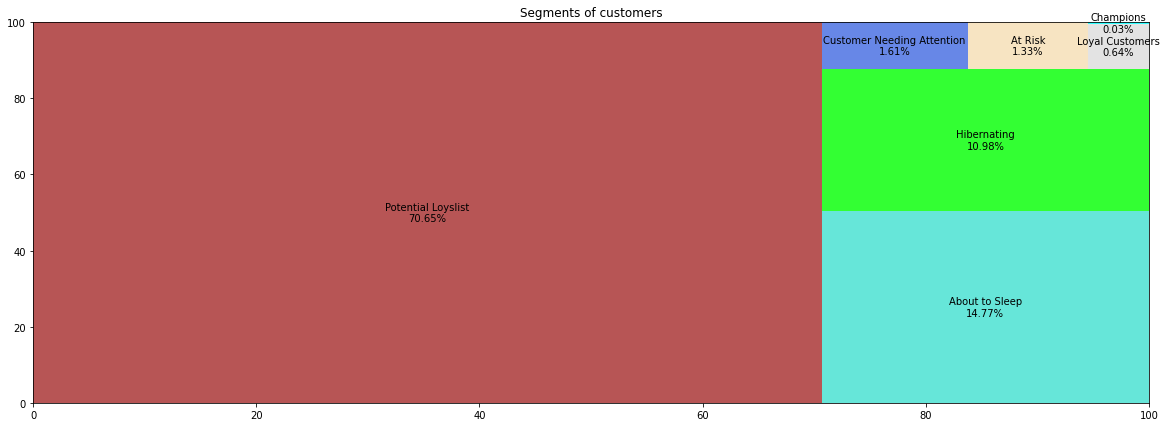

In [ ]:

plotSeg = data_cluster['segmento'].value_counts(normalize=True)*100
plotSegIndex = plotSeg.reset_index()

lbl = (plotSeg.index[i] + "\n" + str(round(plotSeg[i], 2)) + '%' for i in range(len(plotSeg)))

# Define the plot sizes
fig, ax = plt.subplots(1, figsize = (20,7))
plt.title('Segments of customers')

sq.plot(sizes= plotSeg,
        color = ['brown','turquoise','lime','royalblue','wheat','gainsboro','aqua','indigo','sandybrown','pink','dodgerblue'],
        pad = False,
        label= lbl,
        alpha = .8)

plt.show()

In [ ]:
data_cluster.head()

,id_cliente,R,F,M,recencia,frequencia,valor_gasto,segmento
0,0000366f3b9a7992bf8c76cfdf3221e2,4,1,2,112,1,129.90,Potential Loyslist
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4,1,1,115,1,18.90,Potential Loyslist
2,0000f46a3911fa3c0805444483337064,1,1,1,538,1,69.00,Hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,2,1,1,322,1,25.99,About to Sleep
4,0004aac84e0df4da2b147fca70cf8255,3,1,2,289,1,180.00,Potential Loyslist


In [ ]:
print(data_cluster.shape[0],data_df.shape[0])

93260 114920


In [ ]:
data_df.columns

Index(['id_pedido', 'status_pedido', 'dia_compra', 'mes_compra', 'ano_compra',
       'dia_semana_compra', 'mes_e_ano_compra', 'data_compra', 'hora_compra',
       'tipo_pagamento', 'ordem_pagamento', 'qtd_parcelas', 'total_pago',
       'dif_previsao_entrega', 'id_produto', 'categoria', 'id_item_pedido',
       'preço', 'valor_frete', 'nota', 'id_cliente', 'customer_unique_id',
       'cidade_cliente', 'estado_cliente', 'regiao_cliente', 'recencia',
       'frequencia', 'qtd_itens'],
      dtype='object')

In [ ]:
query = """
  select
    a.*,
    b.segmento
  from
    data_df a
  left join 
    data_cluster b on a.customer_unique_id=b.id_cliente
"""

In [ ]:
data_df = ps.sqldf(query, locals())

In [ ]:
data_df.head()

,id_pedido,status_pedido,dia_compra,mes_compra,ano_compra,dia_semana_compra,mes_e_ano_compra,data_compra,hora_compra,tipo_pagamento,ordem_pagamento,qtd_parcelas,total_pago,dif_previsao_entrega,id_produto,categoria,id_item_pedido,preço,valor_frete,nota,id_cliente,customer_unique_id,cidade_cliente,estado_cliente,regiao_cliente,recencia,frequencia,qtd_itens,segmento
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2,10,2017,seg,10-2017,2017-10-02,12:00:00.000000,credit_card,1.0,1.0,18.12,7,87285b34884572647811a353c7ac498a,utilidades_domesticas,1,29.99,8.72,4.0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,Sudeste,112.0,129.90,1,About to Sleep
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2,10,2017,seg,10-2017,2017-10-02,12:00:00.000000,voucher,3.0,1.0,2.00,7,87285b34884572647811a353c7ac498a,utilidades_domesticas,1,29.99,8.72,4.0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,Sudeste,115.0,18.90,1,About to Sleep
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2,10,2017,seg,10-2017,2017-10-02,12:00:00.000000,voucher,2.0,1.0,18.59,7,87285b34884572647811a353c7ac498a,utilidades_domesticas,1,29.99,8.72,4.0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,Sudeste,538.0,69.00,1,About to Sleep
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,24,7,2018,ter,07-2018,2018-07-24,18:00:00.000000,boleto,1.0,1.0,141.46,5,595fac2a385ac33a80bd5114aec74eb8,perfumaria,1,118.70,22.76,4.0,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,barreiras,BA,Nordeste,322.0,25.99,1,Potential Loyslist
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,8,8,2018,qua,08-2018,2018-08-08,06:00:00.000000,credit_card,1.0,3.0,179.12,17,aa4383b373c6aca5d8797843e5594415,automotivo,1,159.90,19.22,5.0,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,Centro-Oeste,289.0,180.00,1,Potential Loyslist


In [ ]:
data_df.nota.value_counts(normalize=True)*100

5.0    57.819353
4.0    19.156805
1.0    11.319179
3.0     8.343195
2.0     3.361469
Name: nota, dtype: float64

In [ ]:
data_df.categoria.value_counts(normalize=True)[:10]*100

cama_mesa_banho           10.134876
beleza_saude               8.477202
esporte_lazer              7.588757
moveis_decoracao           7.439958
informatica_acessorios     6.870867
utilidades_domesticas      6.234772
relogios_presentes         5.273234
telefonia                  4.003655
ferramentas_jardim         3.880961
automotivo                 3.724330
Name: categoria, dtype: float64

In [ ]:
data_df.segmento.value_counts(normalize=True)*100

Potential Loyslist            69.832057
About to Sleep                14.230769
Hibernating                   10.678733
Customer Needing Attention     2.121476
At Risk                        1.600244
Loyal Customers                1.358336
Champions                      0.178385
Name: segmento, dtype: float64

In [ ]:
total_pago = data_df.groupby('segmento')['total_pago'].describe().reset_index()
total_pago['%prop'] = (total_pago['count'] / total_pago['count'].sum()) * 100
total_pago = total_pago.sort_values(by=total_pago.columns[9],ascending=False)
total_pago

,segmento,count,mean,std,min,25%,50%,75%,max,%prop
6,Potential Loyslist,80251.0,161.099270,193.444718,0.00,61.3700,108.740,186.8400,6081.54,69.832057
0,About to Sleep,16354.0,125.260175,138.290492,0.01,56.7800,94.300,155.1400,2262.80,14.230769
4,Hibernating,12272.0,119.261988,107.938930,0.00,52.3800,92.110,151.6025,1315.90,10.678733
3,Customer Needing Attention,2438.0,401.297441,385.639255,0.00,137.6675,322.735,511.6050,2487.24,2.121476
1,At Risk,1839.0,452.570952,442.225590,0.52,171.5650,360.030,542.6100,3666.42,1.600244
5,Loyal Customers,1561.0,794.673370,1236.532730,1.70,162.3300,391.660,1021.4800,13664.08,1.358336
2,Champions,205.0,405.221171,416.252993,21.77,98.7200,218.250,599.5600,1253.03,0.178385


In [ ]:
rel_customer_price = data_df.groupby(['mes_e_ano_compra','preço'])['customer_unique_id'].nunique().sort_values(ascending=False).reset_index()
rel_customer_price = rel_customer_price.groupby(['mes_e_ano_compra']).agg({'preço':'sum','customer_unique_id':'sum'}).reset_index()
rel_customer_price.head()

,mes_e_ano_compra,preço,customer_unique_id
0,01-2017,55542.93,758
1,01-2018,255372.39,7276
2,02-2017,95058.38,1667
3,02-2018,231579.29,6652
4,03-2017,148592.39,2594


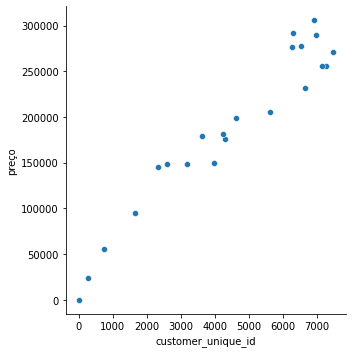

In [ ]:
sns.relplot(y="preço",x="customer_unique_id",sizes=(20,30), data=rel_customer_price,palette='Set2')

In [ ]:
data_df.describe()

,dia_compra,mes_compra,ano_compra,ordem_pagamento,qtd_parcelas,total_pago,dif_previsao_entrega,id_item_pedido,preço,valor_frete,nota,recencia,frequencia
count,114920.000000,114920.000000,114920.000000,114920.00000,114920.000000,114920.000000,114920.000000,114920.000000,114920.000000,114920.000000,114920.000000,93183.000000,93183.000000
mean,15.551349,6.033780,2017.540863,1.09075,2.934920,170.332946,11.040263,1.196380,118.750703,19.837798,4.087957,238.465976,130.546251
std,8.666593,3.228025,0.504076,0.68468,2.770359,256.649872,10.161005,0.699339,170.377836,14.527941,1.344280,152.530076,183.567907
min,1.000000,1.000000,2016.000000,1.00000,0.000000,0.000000,-189.000000,1.000000,0.850000,0.000000,1.000000,1.000000,0.850000
25%,8.000000,3.000000,2017.000000,1.00000,1.000000,60.850000,6.000000,1.000000,39.900000,13.080000,4.000000,115.000000,44.900000
50%,16.000000,6.000000,2018.000000,1.00000,2.000000,108.100000,12.000000,1.000000,74.900000,16.280000,5.000000,220.000000,80.000000
75%,23.000000,8.000000,2018.000000,1.00000,4.000000,188.690000,16.000000,1.000000,132.800000,21.150000,5.000000,347.000000,148.000000
max,31.000000,12.000000,2018.000000,26.00000,24.000000,13664.080000,146.000000,21.000000,2999.990000,196.940000,5.000000,696.000000,3459.000000
